# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 1 - Extraction

import packages needed except for the bonus
, read the csv file
and display the first 5 rows and displaying all coloumns 

In [2908]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [2909]:
fintech_df=pd.read_csv("C:/Users/hp/Downloads/DE PROJECT1/fintech_data_30_52_21362.csv")

In [2910]:
pd.set_option('display.max_columns', None)
fintech_df.head()

Customer Id  \
0  YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
1  YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
2  YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
3  Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
4  YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                  Emp Title Emp Length Home Ownership  Annual Inc  \
0               Underwrirer  10+ years       MORTGAGE     90000.0   
1  Regional sales Executive    4 years           RENT     72000.0   
2     Library Specialist II    2 years           RENT     40000.0   
3                  Attorney    3 years       MORTGAGE    120000.0   
4                     owner    8 years           RENT     55000.0   

   Annual Inc Joint Verification Status Zip Code Addr State  Avg Cur Bal  \
0               NaN            Verified    346xx         FL      27978.0   
1               NaN     Source Verified    640xx         MO       2098.0   
2               NaN     Source Verified    201xx         VA      17544.0   
3               NaN            Verified    303xx         GA      10021.0   
4               NaN        Not Verified    333xx         FL       4200.0   

   Tot Cur Bal  Loan Id      Loan Status  Loan Amount State  Funded Amount  \
0     335738.0    70935          Current       8400.0    FL         8400.0   
1      33560.0    63172       Fully Paid       8000.0    MO         8000.0   
2     140349.0    14799  In Grace Period       3500.0    VA         3500.0   
3     210444.0   259816       Fully Paid      35000.0    GA        35000.0   
4      16800.0   191729          Current      20000.0    FL        20000.0   

         Term  Int Rate  Grade        Issue Date  Pymnt Plan        Type  \
0   36 months    0.0881      4   19 January 2019       False  Individual   
1   36 months    0.0789      1      15 July 2015       False  Individual   
2   36 months    0.1806     18      17 July 2017       False  Individual   
3   60 months    0.1531     11  16 February 2016       False  INDIVIDUAL   
4   36 months    0.1049      7      16 July 2016       False  INDIVIDUAL   

              Purpose         Description  
0  debt_consolidation  Debt consolidation  
1    home_improvement    Home improvement  
2               other               Other  
3  debt_consolidation  Debt consolidation  
4  debt_consolidation  Debt consolidation

# 2- EDA

### EDA Question 1
What is the average loan amount across different loan purposes, and how does this differ by home ownership status?
 understand how much people borrow based on the purpose of their loans and whether owning a home influences the loan amount.

Home Ownership               ANY      MORTGAGE           OWN          RENT
Purpose                                                                   
car                          NaN   9886.725664  10637.500000  10424.494949
credit_card         12321.052632  17720.885015  14923.422160  13513.110659
debt_consolidation  13590.000000  18368.279390  15260.548327  14425.690763
home_improvement    11750.000000  15496.352584  13592.244526  13871.069182
house                        NaN  14754.166667  14270.000000  15817.647059
major_purchase               NaN  12665.777778  11295.312500  11755.131004
medical                      NaN   8954.623288   7020.000000   9207.558140
moving                       NaN  11032.692308  13175.000000   7004.310345
other               36000.000000  11558.892857  11115.577889   9777.628205
renewable_energy             NaN   7000.000000  20000.000000   4637.500000
small_business       6000.000000  18786.304348  19395.000000  15930.882353
vacation                 

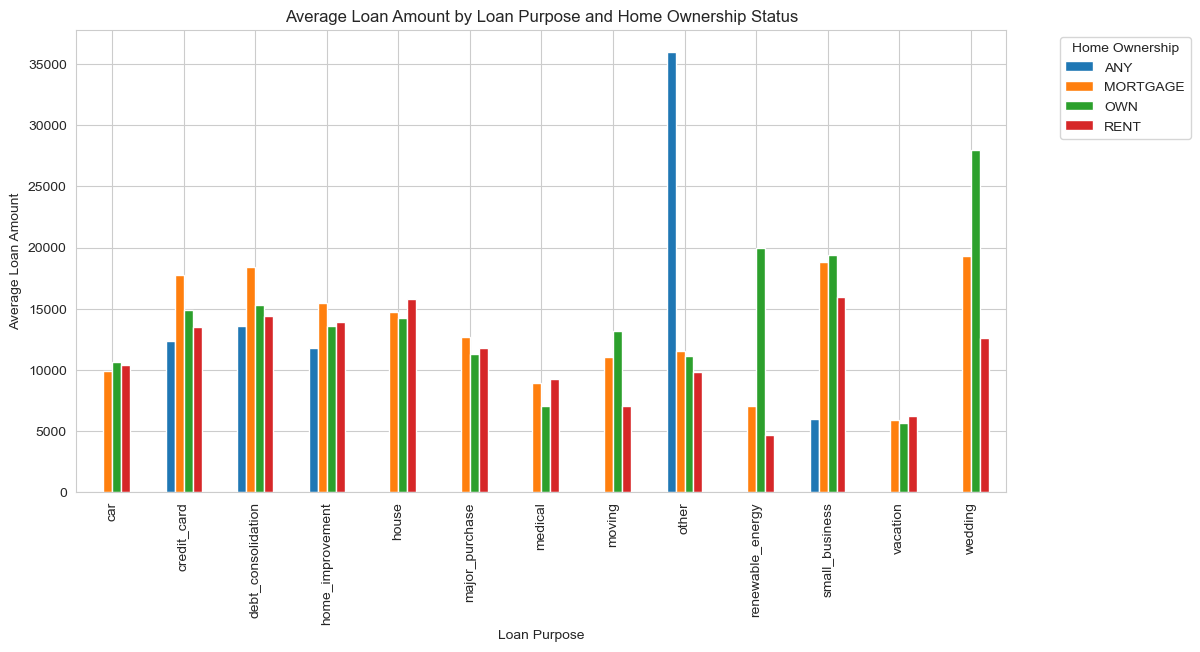

In [2911]:


avg_loan_by_purpose_home = fintech_df.groupby(['Purpose', 'Home Ownership'])['Loan Amount'].mean().unstack()

print(avg_loan_by_purpose_home)
# Visualize
avg_loan_by_purpose_home.plot(kind='bar', figsize=(12, 6))
plt.title('Average Loan Amount by Loan Purpose and Home Ownership Status')
plt.ylabel('Average Loan Amount')
plt.xlabel('Loan Purpose')
plt.legend(title='Home Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The analysis reveals that **home ownership status** plays a significant role in influencing loan amounts. Borrowers with a **mortgage** tend to take out the largest loans across almost all categories, especially for purposes like **debt consolidation**, **credit card repayment**, and **small business investments**. **Homeowners** also borrow more compared to **renters**, particularly for major life events such as **weddings** and **large purchases**.

In contrast, **renters** generally borrow less across most loan purposes, which may reflect a more conservative borrowing pattern or differences in financial stability. Overall, the data suggests that owning a home, whether outright or through a mortgage, is associated with higher borrowing capacity, particularly for larger or long-term financial commitments.

### EDA Question 2
How does the interest rate vary across different loan grades, and is there a difference in interest rates between joint loans and individual loans?

Consolidated_Type  Direct Pay  Individual     Joint
Grade_Binned                                       
A1-A5                     NaN    0.072444  0.073864
B6-B10               0.103150    0.108527  0.111372
C11-C15              0.150267    0.143775  0.148342
D16-D20              0.184975    0.186635  0.197395
E21-E25              0.215714    0.220246  0.250155
F26-F30              0.234250    0.257263  0.297182
G31-G35              0.278867    0.281209  0.308150


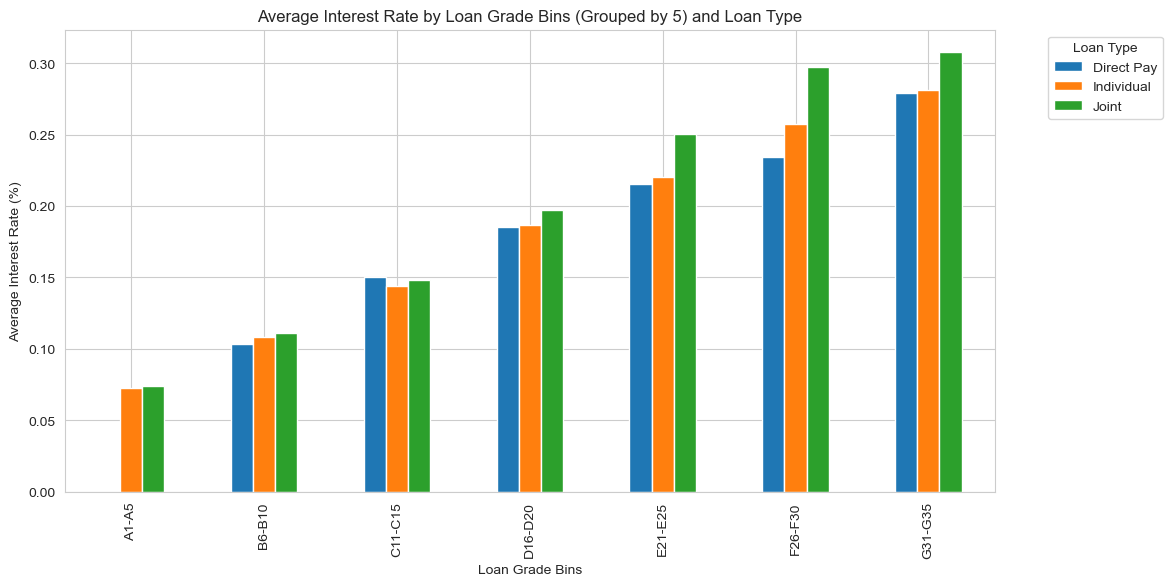

In [2912]:
def map_numeric_to_letter(grade_number):
    if 1 <= grade_number <= 5:
        return 'A'
    elif 6 <= grade_number <= 10:
        return 'B'
    elif 11 <= grade_number <= 15:
        return 'C'
    elif 16 <= grade_number <= 20:
        return 'D'
    elif 21 <= grade_number <= 25:
        return 'E'
    elif 26 <= grade_number <= 30:
        return 'F'
    elif 31 <= grade_number <= 35:
        return 'G'
    else:
        return 'Unknown'


def grade_bin(grade_number):
    letter_grade = map_numeric_to_letter(grade_number)
    bin_start = ((grade_number - 1) // 5) * 5 + 1
    bin_end = bin_start + 4
    return f"{letter_grade}{bin_start}-{letter_grade}{bin_end}"

fintech_df['Grade_Binned'] = fintech_df['Grade'].apply(grade_bin)


loan_type_mapping = {
    'INDIVIDUAL': 'Individual',
    'Individual': 'Individual',
    'JOINT': 'Joint',
    'Joint App': 'Joint',
    'DIRECT_PAY': 'Direct Pay'
}

fintech_df['Consolidated_Type'] = fintech_df['Type'].map(loan_type_mapping)

#Group by the new grade bins and loan type, and calculate the mean interest rate
avg_int_rate_by_binned_grade_type = fintech_df.groupby(['Grade_Binned', 'Consolidated_Type'])['Int Rate'].mean().unstack()

print(avg_int_rate_by_binned_grade_type)
# Visualize
avg_int_rate_by_binned_grade_type.plot(kind='bar', figsize=(12, 6))
plt.title('Average Interest Rate by Loan Grade Bins (Grouped by 5) and Loan Type')
plt.ylabel('Average Interest Rate (%)')
plt.xlabel('Loan Grade Bins')
plt.legend(title='Loan Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The average interest rates increase progressively with higher loan grade bins across all loan types. **Joint** loans consistently have the highest average interest rates, followed closely by **Individual** loans, while **Direct Pay** loans show the lowest rates, particularly in the higher grade bins. This trend suggests that as loan grades increase, both individual and joint borrowers face escalating interest costs.


### EDA Question 3
 How does the distribution of loan statuses vary across states for borrowers whose loan amounts are lower than their annual incomes? Are there significant differences in default rates among different states?

Loan Status  Charged Off   Current   Default  Fully Paid  In Grace Period  \
Addr State                                                                  
AK              0.102941  0.558824  0.000000    0.294118         0.000000   
AL              0.078125  0.631250  0.000000    0.268750         0.006250   
AR              0.061611  0.677725  0.000000    0.246445         0.009479   
AZ              0.064567  0.611024  0.000000    0.310236         0.001575   
CA              0.076359  0.603804  0.000000    0.297826         0.006522   
CO              0.047934  0.623140  0.000000    0.319008         0.001653   
CT              0.050891  0.687023  0.000000    0.251908         0.002545   
DC              0.043478  0.565217  0.000000    0.362319         0.000000   
DE              0.102941  0.632353  0.000000    0.264706         0.000000   
FL              0.073158  0.640907  0.000000    0.266358         0.006698   
GA              0.052339  0.620267  0.001114    0.302895         0.010022   

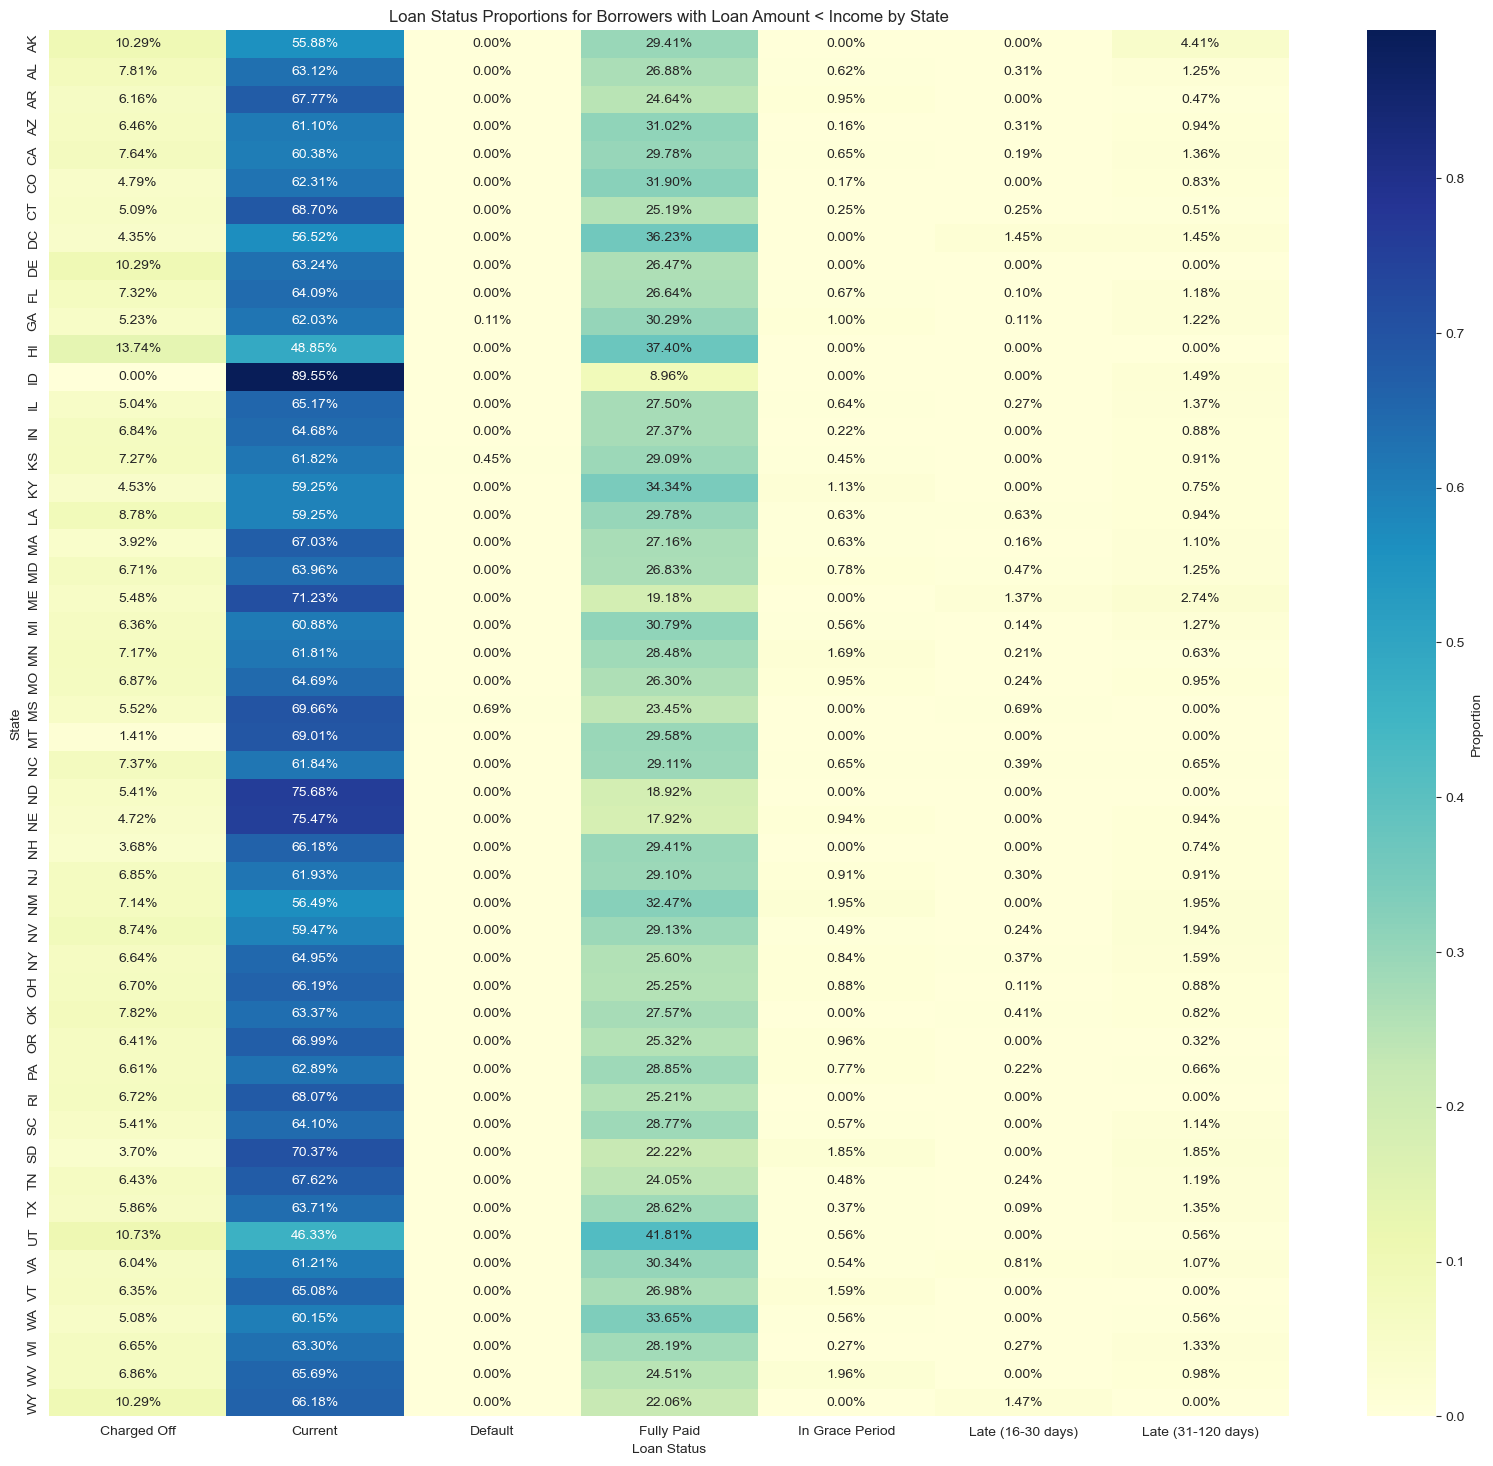

In [2913]:
low_loan_borrowers = fintech_df[fintech_df['Loan Amount'] < fintech_df['Annual Inc']]
heatmap_data = low_loan_borrowers.groupby(['Addr State', 'Loan Status']).size().unstack().fillna(0)

# visualize
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
print(heatmap_data_normalized)
plt.figure(figsize=(20, 18))
sns.heatmap(heatmap_data_normalized, annot=True, fmt='.2%', cmap='YlGnBu', cbar_kws={'label': 'Proportion'})
plt.title('Loan Status Proportions for Borrowers with Loan Amount < Income by State')
plt.ylabel('State')
plt.xlabel('Loan Status')
plt.show()


The heatmap reveals that states like **Idaho (ID)**and **Montana (MT)** have a high proportion of fully paid and current loans, indicating strong borrower repayment behavior and lower risk. In contrast, states such as **Hawaii (HI)** and **Maine (ME)** show higher rates of charged-off and late loans, suggesting elevated financial stress and greater lending risk.


### EDA Qusetion 4
How does the average loan amount vary across different states, and what role does the loan's verification status play in these variations?

    State Verification Status  Average_Loan_Amount
95     NM            Verified         21432.978723
2      AK            Verified         20359.722222
77     MT            Verified         20226.190476
134    VA            Verified         19879.088785
89     NH            Verified         19637.500000
122    SD            Verified         19159.615385
0      AK        Not Verified         19138.157895
83     ND            Verified         19129.687500
59     MD            Verified         19009.795322
140    WA            Verified         19008.392857
35     HI            Verified         18815.000000
1      AK     Source Verified         18779.032258
128    TX            Verified         18699.768089
110    OR            Verified         18613.043478
44     IN            Verified         18535.307018
14     CA            Verified         18488.216216
121    SD     Source Verified         18482.142857
80     NC            Verified         18158.990148
146    WV            Verified  

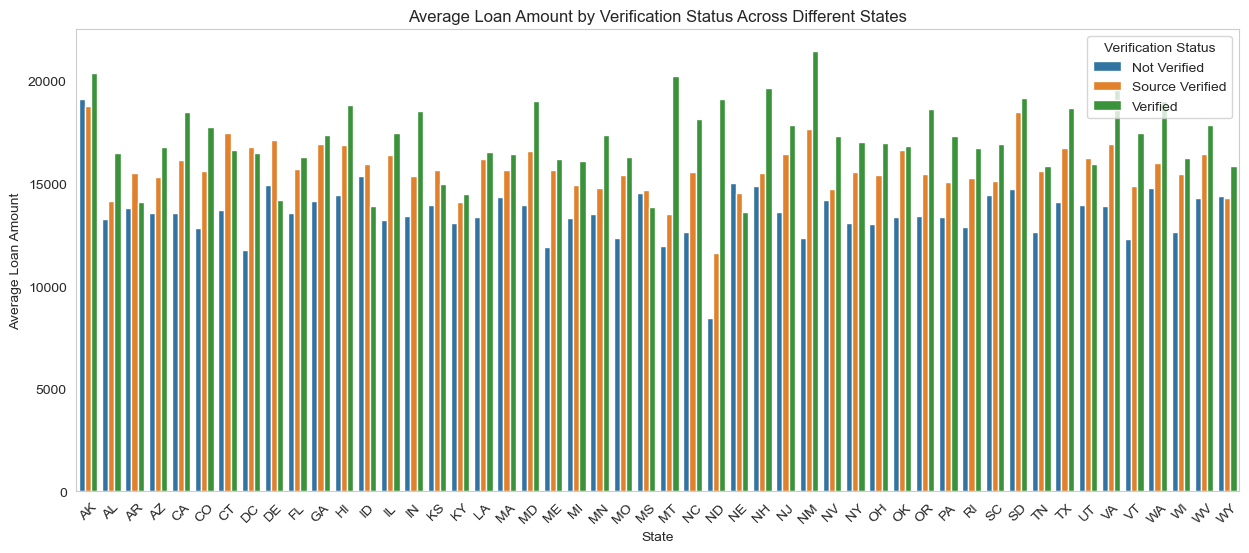

In [2914]:
grouped = fintech_df.groupby(['State', 'Verification Status']).agg(
    Average_Loan_Amount=('Loan Amount', 'mean')
).reset_index()


pd.set_option('display.max_rows', None)  
print(grouped.sort_values(by="Average_Loan_Amount", ascending=False))
pd.reset_option('display.max_rows')

# Visualize
plt.figure(figsize=(15, 6))
sns.barplot(data=grouped, x='State', y='Average_Loan_Amount', hue='Verification Status')
plt.title('Average Loan Amount by Verification Status Across Different States')
plt.xlabel('State')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Verification Status')
plt.grid(axis='y')
plt.show()

The borrowers with **Verified** status generally receive the highest average loan amounts, with New Mexico (NM)and Alaska(AK) showing the highest values among verified loans. In contrast, North Dakota(ND) has the lowest average loan amount, particularly for those classified as "Not Verified." This indicates a strong correlation between verification status and loan amounts, alongside significant geographical variations in lending practices that may reflect underlying economic conditions across states

### EDA Question 5

How do employment length and home ownership status influence the purpose of loans among borrowers?

Purpose                         car  credit_card  debt_consolidation  \
Emp Length Home Ownership                                              
1 year     ANY             0.000000     1.000000            0.000000   
           MORTGAGE        0.011364     0.218750            0.576705   
           OWN             0.013245     0.245033            0.529801   
           RENT            0.007535     0.274489            0.570506   
10+ years  ANY             0.000000     0.555556            0.222222   
           MORTGAGE        0.009522     0.215273            0.575056   
           OWN             0.009747     0.211501            0.541910   
           RENT            0.006913     0.221635            0.607157   
2 years    ANY             0.000000     1.000000            0.000000   
           MORTGAGE        0.007495     0.240899            0.555675   
           OWN             0.014493     0.246377            0.545894   
           RENT            0.010327     0.272806            0.57

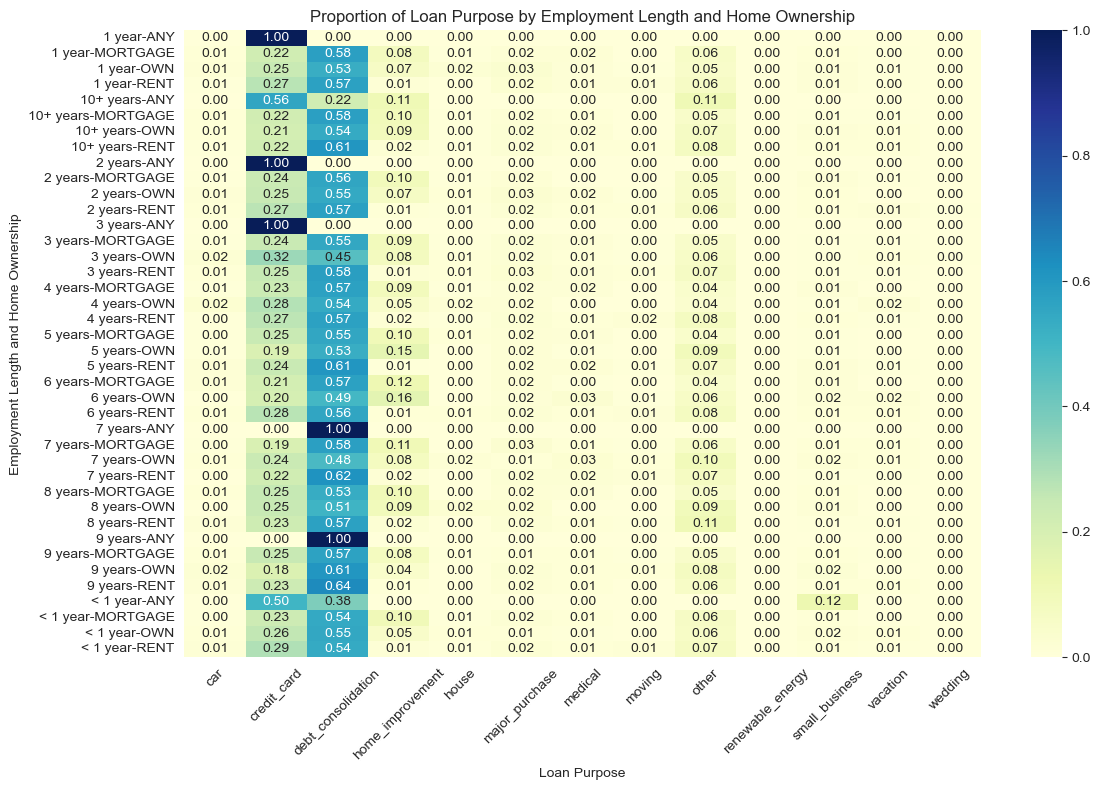

In [2915]:
cross_tab = pd.crosstab(index=[fintech_df['Emp Length'], fintech_df['Home Ownership']], columns=fintech_df['Purpose'])

# Normalize the data to show proportions
normalized_cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

print(normalized_cross_tab)
# visualize
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_cross_tab, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Proportion of Loan Purpose by Employment Length and Home Ownership')
plt.xlabel('Loan Purpose')
plt.ylabel('Employment Length and Home Ownership')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


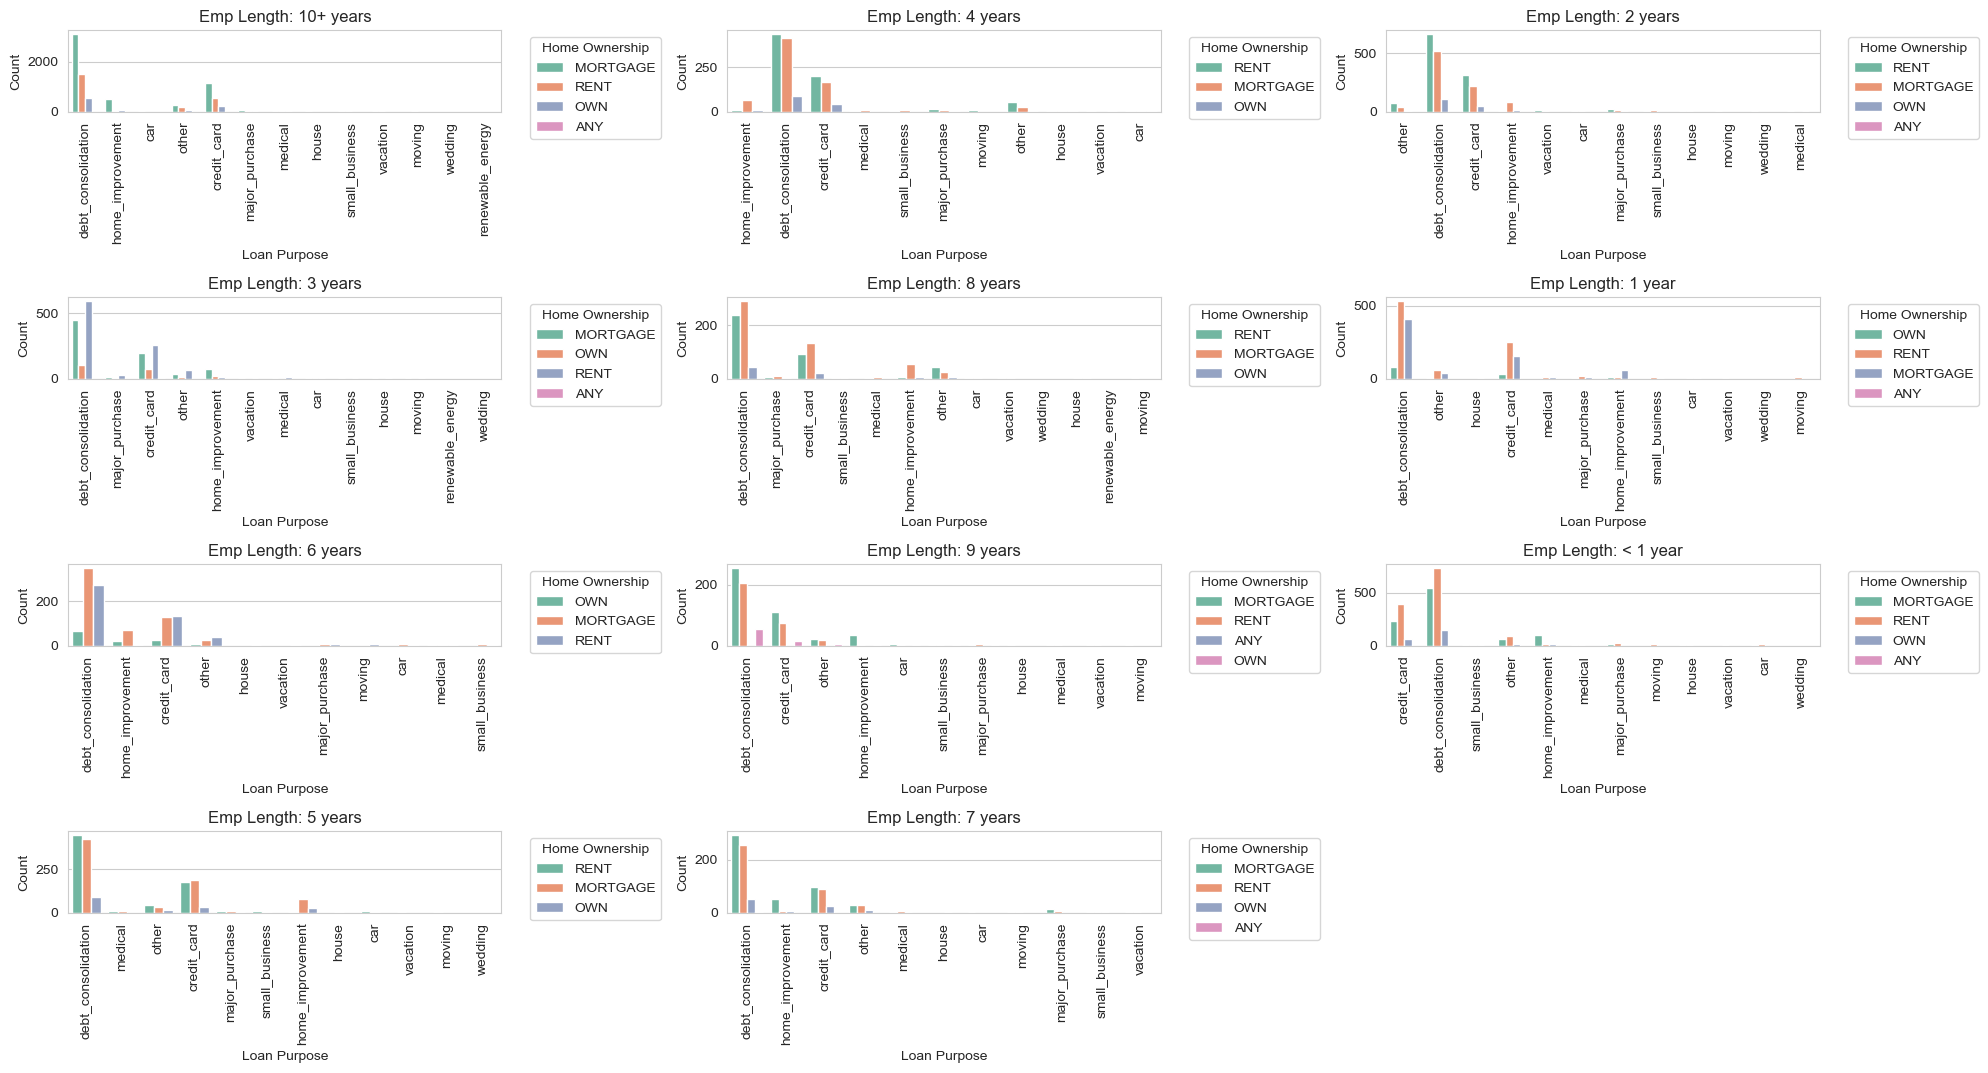

In [2916]:
plt.figure(figsize=(20, 12))  
employment_categories_notNull = fintech_df[fintech_df["Emp Length"].notna()]
employment_categories = employment_categories_notNull["Emp Length"].unique()

for i, emp_length in enumerate(employment_categories):
    plt.subplot(5, 3, i + 1)  
    subset = fintech_df[fintech_df['Emp Length'] == emp_length]
    
    # Create a count plot for Home Ownership vs Purpose for each Employment Length
    sns.countplot(data=subset, x='Purpose', hue='Home Ownership', palette='Set2')
    
    plt.title(f'Emp Length: {emp_length}')
    plt.xlabel('Loan Purpose')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    # Move the legend outside the plot
    plt.legend(title='Home Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Most mortgages are taken out by homeowners who are likely to seek loans for home improvement or related purposes, while it is very rare for renters to do so, which is reasonable. Small business owners with less than one year of homeownership(any) show a high percentage of taking these loans, possibly because they need to start their career life. Debt is the most targeted loan across all lengths and all types of homeownership.

### EDA Question 6
How does the number of loans issued vary between borrowers with 'Verified' or 'Source Verified' income and those with 'Not Verified' income across one-year intervals

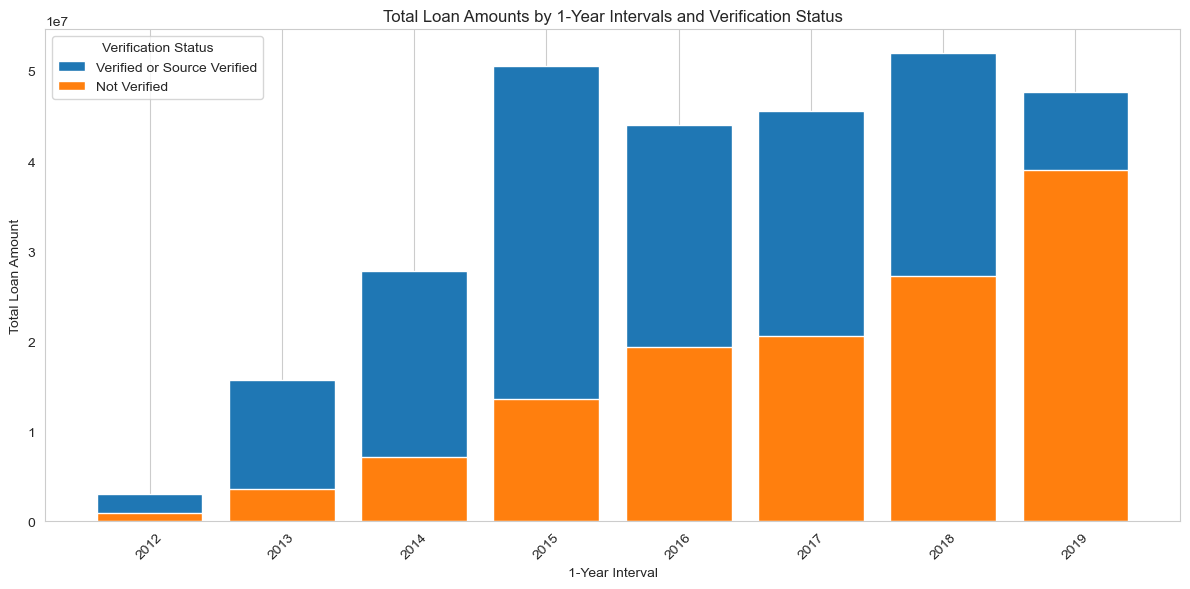

In [2917]:
fintech_df['Issue Date'] = pd.to_datetime(fintech_df['Issue Date'])


fintech_df['1-Year Interval'] = fintech_df['Issue Date'].dt.year


fintech_df['Combined Verification Status'] = fintech_df['Verification Status'].replace({
    'Verified': 'Verified or Source Verified',
    'Source Verified': 'Verified or Source Verified'
})


loan_summary = fintech_df.groupby(['1-Year Interval', 'Combined Verification Status']).agg(
    total_loans=('Loan Amount', 'sum'),
    count_loans=('Loan Id', 'count'),
    average_loan_amount=('Loan Amount', 'mean')
).reset_index()

verification_statuses = ['Verified or Source Verified', 'Not Verified']
all_intervals = loan_summary['1-Year Interval'].unique()


complete_summary = pd.DataFrame(
    [(interval, status) for interval in all_intervals for status in verification_statuses],
    columns=['1-Year Interval', 'Combined Verification Status']
).merge(loan_summary, on=['1-Year Interval', 'Combined Verification Status'], how='left').fillna(0)




# Visualization
plt.figure(figsize=(12, 6))
for status in verification_statuses:
    subset = complete_summary[complete_summary['Combined Verification Status'] == status]
    plt.bar(
        subset['1-Year Interval'].astype(str),
        subset['total_loans'],
        label=status
    )

plt.title('Total Loan Amounts by 1-Year Intervals and Verification Status')
plt.xlabel('1-Year Interval')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Verification Status')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


reveals a significant increase in the number of loans issued from 2012 to 2019, peaking in 2018. Interestingly, it was observed that the number of loans issued to borrowers with 'Not Verified' income has also increased over this period. Remarkably, those with 'Not Verified' income obtained approximately four out of five 'Verified' counterparts in 2019!!!. This surprising trend may reflect broader changes in the lending landscape, potentially indicating a shift in lending practices or a growing acceptance of borrowers without verified income.

In [2918]:
columns_to_keep = [
    'Customer Id', 
    'Emp Title', 
    'Emp Length', 
    'Home Ownership', 
    'Annual Inc', 
    'Annual Inc Joint', 
    'Verification Status', 
    'Zip Code', 
    'Addr State', 
    'Avg Cur Bal', 
    'Tot Cur Bal', 
    'Loan Id', 
    'Loan Status', 
    'Loan Amount', 
    'State', 
    'Funded Amount', 
    'Term', 
    'Int Rate', 
    'Grade', 
    'Issue Date', 
    'Pymnt Plan', 
    'Type', 
    'Purpose', 
    'Description',
]


fintech_df = fintech_df.loc[:, columns_to_keep]


fintech_df.head()

Customer Id  \
0  YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
1  YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
2  YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
3  Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
4  YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                  Emp Title Emp Length Home Ownership  Annual Inc  \
0               Underwrirer  10+ years       MORTGAGE     90000.0   
1  Regional sales Executive    4 years           RENT     72000.0   
2     Library Specialist II    2 years           RENT     40000.0   
3                  Attorney    3 years       MORTGAGE    120000.0   
4                     owner    8 years           RENT     55000.0   

   Annual Inc Joint Verification Status Zip Code Addr State  Avg Cur Bal  \
0               NaN            Verified    346xx         FL      27978.0   
1               NaN     Source Verified    640xx         MO       2098.0   
2               NaN     Source Verified    201xx         VA      17544.0   
3               NaN            Verified    303xx         GA      10021.0   
4               NaN        Not Verified    333xx         FL       4200.0   

   Tot Cur Bal  Loan Id      Loan Status  Loan Amount State  Funded Amount  \
0     335738.0    70935          Current       8400.0    FL         8400.0   
1      33560.0    63172       Fully Paid       8000.0    MO         8000.0   
2     140349.0    14799  In Grace Period       3500.0    VA         3500.0   
3     210444.0   259816       Fully Paid      35000.0    GA        35000.0   
4      16800.0   191729          Current      20000.0    FL        20000.0   

         Term  Int Rate  Grade Issue Date  Pymnt Plan        Type  \
0   36 months    0.0881      4 2019-01-19       False  Individual   
1   36 months    0.0789      1 2015-07-15       False  Individual   
2   36 months    0.1806     18 2017-07-17       False  Individual   
3   60 months    0.1531     11 2016-02-16       False  INDIVIDUAL   
4   36 months    0.1049      7 2016-07-16       False  INDIVIDUAL   

              Purpose         Description  
0  debt_consolidation  Debt consolidation  
1    home_improvement    Home improvement  
2               other               Other  
3  debt_consolidation  Debt consolidation  
4  debt_consolidation  Debt consolidation

drop coloumns that used

### EDA Question 7


how many loans is taken in each state in each month is there month has high loans comapred to other?

    State      month  loan_count
0      AK      April           3
1      AK     August           3
2      AK   December           5
3      AK   February           6
4      AK    January           8
..    ...        ...         ...
595    WY      March           8
596    WY        May           5
597    WY   November           8
598    WY    October           6
599    WY  September           5

[600 rows x 3 columns]


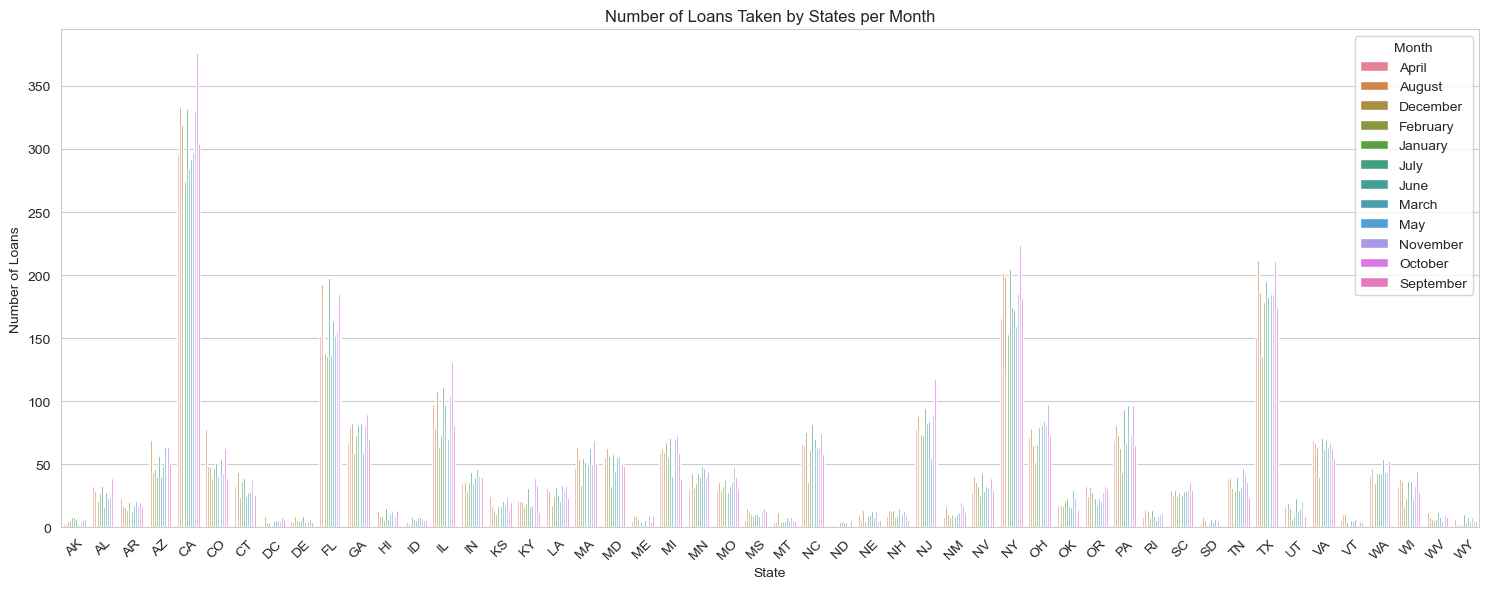

In [2919]:
fintech_df['Issue Date'] = pd.to_datetime(fintech_df['Issue Date'])
fintech_df['month'] = fintech_df["Issue Date"].dt.strftime('%B') 
loan_counts_by_state_month = fintech_df.groupby(['State', 'month']).size().reset_index(name='loan_count')
print(loan_counts_by_state_month)

plt.figure(figsize=(15, 6))
sns.barplot(data=loan_counts_by_state_month, x='State', y='loan_count', hue='month')

plt.title('Number of Loans Taken by States per Month')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.legend(title='Month', loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 3 - Cleaning Data

## Tidying up column names

MAKE columns lower case no space at beginning or at the end replace spaces by _

In [2920]:
fintech_df.columns = (
    fintech_df.columns
    .str.strip()                     # Remove leading/trailing spaces
    .str.lower()                     # Convert to lowercase
    .str.replace(' ', '_')           # Replace spaces with underscores
    .str.replace(r'[^a-zA-Z0-9_]', '', regex=True)  # Remove special characters
)
print(fintech_df.columns)

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description', 'month'],
      dtype='object')


loan id will be unique 
note that may be 2 customers have 2 loans so customer id cant be used and some cases if joint loan the record may be dups with same loan id but here none of loan id or customer id is dup so i will choose loan id

In [2921]:
fintech_df.set_index("loan_id",inplace=True)

## Observe inconsistent data

check if there any row duplicate ,However there is no duplicate in rows and check also if there customer twice but also no but there exist duplicate coloumns 
State and addr State however i think this is by coincedence because most of people who live in a city will have a loan from this city but this may be not the case generally so i will keep it as it.

In [2922]:
# Check for duplicates
duplicates = fintech_df[fintech_df.duplicated()]
print(f'Duplicates found:\n{duplicates}')

duplicates = fintech_df['customer_id'].duplicated()
duplicate_rows = fintech_df[duplicates]
print(duplicate_rows)

Duplicates found:
Empty DataFrame
Columns: [customer_id, emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description, month]
Index: []
Empty DataFrame
Columns: [customer_id, emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description, month]
Index: []


In [2923]:
equal_columns = fintech_df['state'] == fintech_df['addr_state']
print((equal_columns==False).sum())

0


Type coloumn has different shapes of the same words for individual and joint so we have to combine the shapes to one shape

In [2924]:
fintech_df["type"].unique()

array(['Individual', 'INDIVIDUAL', 'Joint App', 'JOINT', 'DIRECT_PAY'],
      dtype=object)

check for negative values in numeric coloumns

In [2925]:
incorrect_data = fintech_df[(fintech_df['annual_inc'] < 0) | (fintech_df['loan_amount'] < 0)|(fintech_df["funded_amount"] < 0)|(fintech_df["avg_cur_bal"] < 0)|(fintech_df["tot_cur_bal"] < 0)
                            |(fintech_df["int_rate"] < 0)|(fintech_df['annual_inc_joint'] < 0)]
print(f'Incorrect data found:\n{incorrect_data}')

Incorrect data found:
Empty DataFrame
Columns: [customer_id, emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description, month]
Index: []


In [2926]:
fintech_df["home_ownership"].groupby(fintech_df["home_ownership"]).value_counts()
fintech_df["home_ownership"].groupby(fintech_df["home_ownership"]).value_counts()

home_ownership  home_ownership
ANY             ANY                  33
MORTGAGE        MORTGAGE          13259
OWN             OWN                3049
RENT            RENT              10688
Name: count, dtype: int64

check if numeric columns has values not numbers

In [2927]:
numeric_columns = [
    'annual_inc', 
    'annual_inc_joint', 
    'avg_cur_bal', 
    'tot_cur_bal', 
    'loan_amount', 
    'funded_amount', 
    'int_rate'
]

# Loop through each numeric column
for col in numeric_columns:
    # Filter out NaN values before checking for non-numeric entries
    filtered_df = fintech_df[fintech_df[col].notna()]

    # Display rows that are not numeric
    non_numeric_values = filtered_df[~filtered_df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    
    print(f"\nNon-numeric values in '{col}':")
    print(non_numeric_values)


Non-numeric values in 'annual_inc':
Empty DataFrame
Columns: [customer_id, emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description, month]
Index: []

Non-numeric values in 'annual_inc_joint':
Empty DataFrame
Columns: [customer_id, emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description, month]
Index: []

Non-numeric values in 'avg_cur_bal':
Empty DataFrame
Columns: [customer_id, emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, 

In [2928]:
data_types = fintech_df.dtypes
print("Data Types:\n", data_types)

Data Types:
 customer_id                    object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
annual_inc_joint              float64
verification_status            object
zip_code                       object
addr_state                     object
avg_cur_bal                   float64
tot_cur_bal                   float64
loan_status                    object
loan_amount                   float64
state                          object
funded_amount                 float64
term                           object
int_rate                      float64
grade                           int64
issue_date             datetime64[ns]
pymnt_plan                       bool
type                           object
purpose                        object
description                    object
month                          object
dtype: object


convert term 36 ,60 months to numbers

In [2929]:
fintech_df['term_no'] = fintech_df['term'].str.replace(' months', '').astype(int)
fintech_df.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 Underwrirer  10+ years       MORTGAGE     90000.0   
63172    Regional sales Executive    4 years           RENT     72000.0   
14799       Library Specialist II    2 years           RENT     40000.0   
259816                   Attorney    3 years       MORTGAGE    120000.0   
191729                      owner    8 years           RENT     55000.0   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935                 NaN            Verified    346xx         FL   
63172                 NaN     Source Verified    640xx         MO   
14799                 NaN     Source Verified    201xx         VA   
259816                NaN            Verified    303xx         GA   
191729                NaN        Not Verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935        27978.0     335738.0          Current       8400.0    FL   
63172         2098.0      33560.0       Fully Paid       8000.0    MO   
14799        17544.0     140349.0  In Grace Period       3500.0    VA   
259816       10021.0     210444.0       Fully Paid      35000.0    GA   
191729        4200.0      16800.0          Current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description     month  term_no  
loan_id                                                                         
70935    Individual  debt_consolidation  Debt consolidation   January       36  
63172    Individual    home_improvement    Home improvement      July       36  
14799    Individual               other               Other      July       36  
259816   INDIVIDUAL  debt_consolidation  Debt consolidation  February       60  
191729   INDIVIDUAL  debt_consolidation  Debt consolidation      July       36

convert emp_length to datatype float


In [2930]:
fintech_df["emp_length"].unique()

array(['10+ years', '4 years', '2 years', '3 years', '8 years', '1 year',
       nan, '6 years', '9 years', '< 1 year', '5 years', '7 years'],
      dtype=object)

In [2931]:
emp_length_mapping = {
    '< 1 year': 0,  
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10  
}
fintech_df["emp_length_no"] = fintech_df["emp_length"].map(emp_length_mapping)

check grade values between 1 to 35

In [2932]:
is_all_between = fintech_df['grade'].between(1, 35).all()

if is_all_between:
    print("All values in 'grade' are between 1 and 35 inclusive.")
else:
    print("Not all values in 'grade' are between 1 and 35 inclusive.")

All values in 'grade' are between 1 and 35 inclusive.


## Findings and conclusions

replace Individual & Joint App with"INDIVIDUAL" &"JOINT" respectively

In [2933]:
fintech_df["type"]=fintech_df["type"].replace("Individual","INDIVIDUAL")
fintech_df["type"]=fintech_df["type"].replace("Joint App","JOINT")
fintech_df["type"].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

remove duplicates if exists

In [2934]:
fintech_df_cleaned = fintech_df.drop_duplicates()

print(f"Original number of rows: {len(fintech_df)}")
print(f"Number of rows after removing duplicates: {len(fintech_df_cleaned)}")


Original number of rows: 27029
Number of rows after removing duplicates: 27029


if negative values convert to positive values and if value not numerical  replace with Nan

In [2935]:
numeric_columns = [
    'annual_inc', 
    'annual_inc_joint', 
    'avg_cur_bal', 
    'tot_cur_bal', 
    'loan_amount', 
    'funded_amount', 
    'int_rate'
]

# Function to tidy up specified numeric columns and print changes
def tidy_numeric_columns_and_print_changes(df, columns):
    changes = {} 
    
    for column in columns:
        if column in df.columns:
            original_values = df[column].copy()
            df[column] = df[column].abs()
            df[column] = pd.to_numeric(df[column], errors='coerce')
            changes[column] = {
                'original': original_values,
                'modified': df[column]
            }
    
    return df, changes

tidied_fintech_df, changes = tidy_numeric_columns_and_print_changes(fintech_df, numeric_columns)

# Print changes for each column without originally null values
for column, change in changes.items():
    print(f"\nChanges in column '{column}':")
    comparison_df = pd.DataFrame({
        'Original': change['original'],
        'Modified': change['modified']
    })

    filtered_comparison_df = comparison_df[
        (comparison_df['Original'] != comparison_df['Modified']) &
        (comparison_df['Original'].notnull())
    ]
    
    print(filtered_comparison_df)  



Changes in column 'annual_inc':
Empty DataFrame
Columns: [Original, Modified]
Index: []

Changes in column 'annual_inc_joint':
Empty DataFrame
Columns: [Original, Modified]
Index: []

Changes in column 'avg_cur_bal':
Empty DataFrame
Columns: [Original, Modified]
Index: []

Changes in column 'tot_cur_bal':
Empty DataFrame
Columns: [Original, Modified]
Index: []

Changes in column 'loan_amount':
Empty DataFrame
Columns: [Original, Modified]
Index: []

Changes in column 'funded_amount':
Empty DataFrame
Columns: [Original, Modified]
Index: []

Changes in column 'int_rate':
Empty DataFrame
Columns: [Original, Modified]
Index: []


replace any grade not between 1  to 35 with nan

In [2936]:
fintech_df['grade'] = fintech_df['grade'].where(fintech_df['grade'].between(1, 35), np.nan)

convert categorical to lower case to have consistent data

In [2937]:
fintech_df['purpose']=fintech_df['purpose'].str.lower()
fintech_df['home_ownership']=fintech_df['home_ownership'].str.lower()
fintech_df['emp_title']=fintech_df['emp_title'].str.lower()
fintech_df['verification_status']=fintech_df['verification_status'].str.lower()
fintech_df['loan_status']=fintech_df['loan_status'].str.lower()
fintech_df['type']=fintech_df['type'].str.lower()
fintech_df['description']=fintech_df['description'].str.lower()

## Observing outliers

i started by handling outliers before missing bec if somthing will be dropped or consider mssing to be solved later
plot the histogram of the values as you can see the first 4 coloumns 'annual_inc','annual_inc_joint', 'avg_cur_bal','tot_cur_bal'are skewed positive so i will use IQR with while the 3 remaing 'loan_amount', 'funded_amount','int_rate' i will use z-scrore

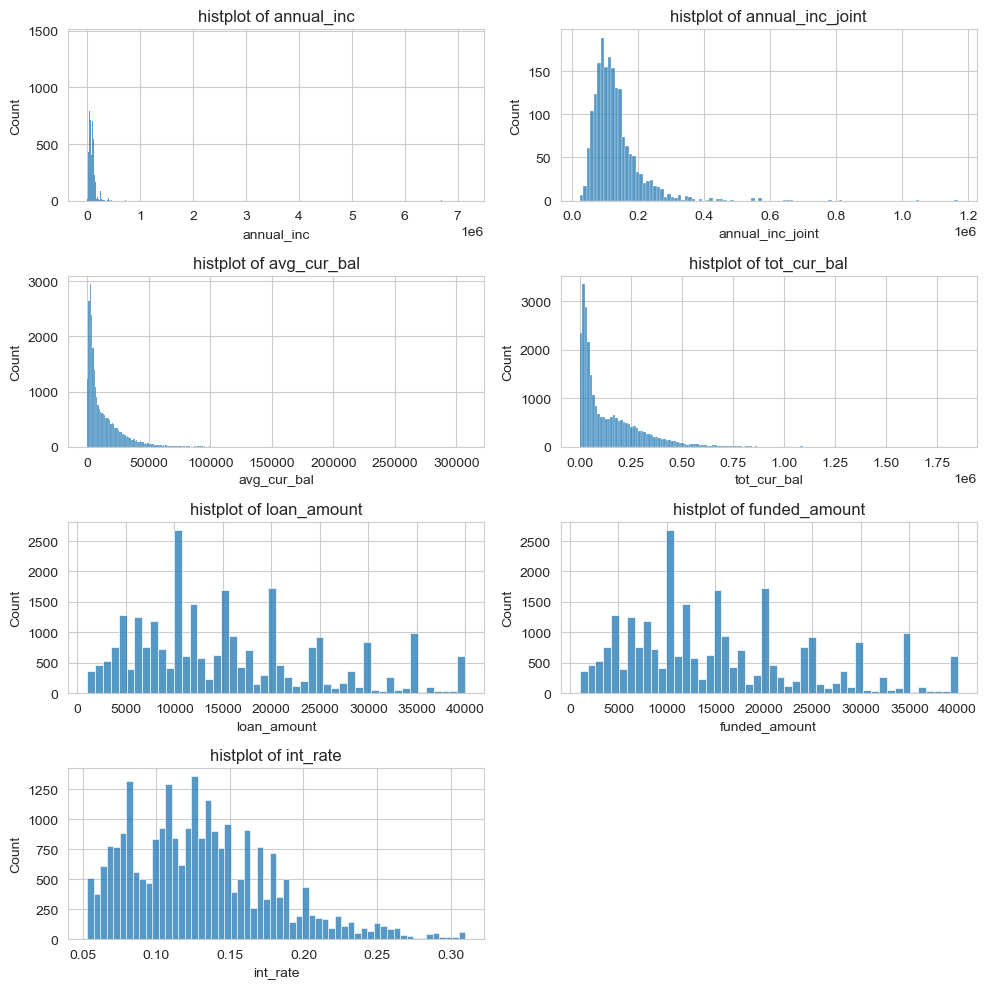

In [2938]:
numerical_cols = ['annual_inc','annual_inc_joint', 'avg_cur_bal','tot_cur_bal', 'loan_amount', 'funded_amount','int_rate',]

plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_cols):
  
    plt.subplot(4, 2, i + 1) 
    sns.set_style('whitegrid')
    sns.histplot(x=fintech_df[col])
    plt.title(f'histplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

this also a test to see how much data is skewed as i said above the first 4 have large skeweness compared to the last 3

In [2939]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['annual_inc', 'annual_inc_joint', 'avg_cur_bal', 'tot_cur_bal', 'loan_amount', 'funded_amount', 'int_rate']:
    skewness = fintech_df[col].skew()
    kurtosis = fintech_df[col].kurtosis()
    print(f'{col} : Skewness: {skewness}, Kurtosis: {kurtosis}')

annual_inc : Skewness: 45.140904198439436, Kurtosis: 3598.336858195497
annual_inc_joint : Skewness: 4.265394272954278, Kurtosis: 35.246668498965306
avg_cur_bal : Skewness: 3.5165305727389247, Kurtosis: 28.459952798036344
tot_cur_bal : Skewness: 2.243223693643247, Kurtosis: 8.858859486012692
loan_amount : Skewness: 0.7695780664493685, Kurtosis: -0.16285754668645103
funded_amount : Skewness: 0.7695780664493685, Kurtosis: -0.16285754668645103
int_rate : Skewness: 0.7662873087726103, Kurtosis: 0.5126275215540956


Percentage of Outliers: 0.000%


0

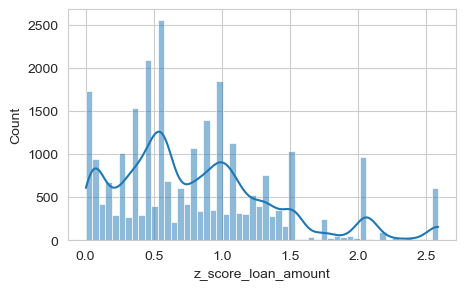

In [2940]:
fintech_df['z_score_loan_amount'] = np.abs((fintech_df['loan_amount'] - fintech_df['loan_amount'].mean()) / fintech_df['loan_amount'].std())
plt.figure(figsize=(5, 3))
sns.histplot(fintech_df['z_score_loan_amount'], kde=True)
z_outliers_mask = fintech_df['z_score_loan_amount'] > 3
fintech_df.drop(columns='z_score_loan_amount', inplace=True)
z_outliers = fintech_df[z_outliers_mask] 
print(f'Percentage of Outliers: {len(z_outliers)/len(fintech_df)*100:.3f}%')
len(z_outliers)

loan amount has no outliers 

Percentage of Outliers: 0.000%


0

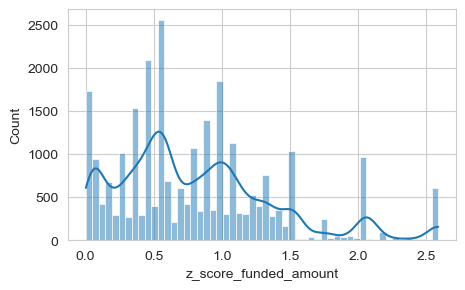

In [2941]:
fintech_df['z_score_funded_amount'] = np.abs((fintech_df['funded_amount'] - fintech_df['funded_amount'].mean()) / fintech_df['funded_amount'].std())
plt.figure(figsize=(5, 3))
sns.histplot(fintech_df['z_score_funded_amount'], kde=True)
z_outliers_mask = fintech_df['z_score_funded_amount'] > 3
fintech_df.drop(columns='z_score_funded_amount', inplace=True)
z_outliers = fintech_df[z_outliers_mask] 
print(f'Percentage of Outliers: {len(z_outliers)/len(fintech_df)*100:.3f}%')
len(z_outliers)

fund amount has no outliers

Percentage of Outliers: 0.803%


217

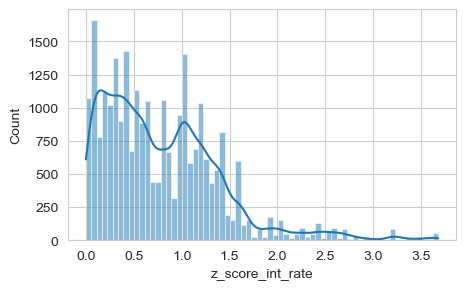

In [2942]:
fintech_df['z_score_int_rate'] = np.abs((fintech_df['int_rate'] - fintech_df['int_rate'].mean()) / fintech_df['int_rate'].std())
plt.figure(figsize=(5, 3))
sns.histplot(fintech_df['z_score_int_rate'], kde=True)
z_outliers_mask = fintech_df['z_score_int_rate'] > 3
fintech_df.drop(columns='z_score_int_rate', inplace=True)
z_outliers = fintech_df[z_outliers_mask] 
print(f'Percentage of Outliers: {len(z_outliers)/len(fintech_df)*100:.3f}%')
len(z_outliers)

interest rate has small percentage of outliers 0.8%

Q1: 47000.000, Q3: 95000.000, IQR: 48000.000
Outliers below: -25000.000
Outliers above: 167000.000
Percentage of Outliers: 5.076%  count of rows :1372


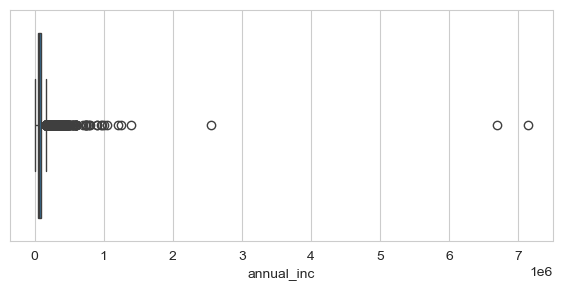

In [2943]:
Q1 = fintech_df["annual_inc"].quantile(0.25)
Q3 = fintech_df["annual_inc"].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

plt.figure(figsize=(7, 3))
sns.boxplot(x=fintech_df['annual_inc'])

print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

iqr_outliers_mask_annual_inc = (fintech_df['annual_inc'] < (Q1 - 1.5 * IQR)) | (fintech_df['annual_inc'] > (Q3 + 1.5 * IQR))
iqr_outliers_annual_inc = fintech_df[iqr_outliers_mask_annual_inc]
print(f'Percentage of Outliers: {len(iqr_outliers_annual_inc)/len(fintech_df)*100:.3f}%  count of rows :{len(iqr_outliers_annual_inc)}')


annual income has a high percentage of outliers 5% compared to interest rate

Q1: 86264.750, Q3: 152000.000, IQR: 65735.250
Outliers below: -12338.125
Outliers above: 250602.875
Percentage of Outliers: 0.381%  count of rows :103


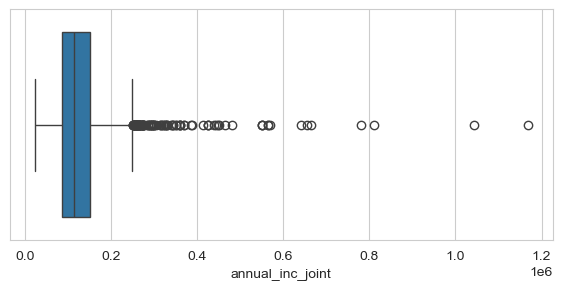

In [2944]:
Q1 = fintech_df["annual_inc_joint"].quantile(0.25)
Q3 = fintech_df["annual_inc_joint"].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

plt.figure(figsize=(7, 3))
sns.boxplot(x=fintech_df['annual_inc_joint'])

print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

iqr_outliers_mask_annual_inc_joint = (fintech_df['annual_inc_joint'] < (Q1 - 1.5 * IQR)) | (fintech_df['annual_inc_joint'] > (Q3 + 1.5 * IQR))
iqr_outliers_annual_inc_joint = fintech_df[iqr_outliers_mask_annual_inc_joint]
print(f'Percentage of Outliers: {len(iqr_outliers_annual_inc_joint)/len(fintech_df)*100:.3f}%  count of rows :{len(iqr_outliers_annual_inc_joint)}')

annual joint has small percentage of outliers 0.381% but knowing that the missing values here is so high so 0.38% is high

Q1: 3099.000, Q3: 18771.000, IQR: 15672.000
Outliers below: -20409.000
Outliers above: 42279.000
Percentage of Outliers: 5.476%  count of rows :1480


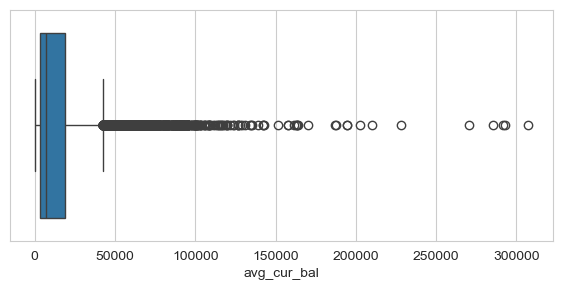

In [2945]:
Q1 = fintech_df["avg_cur_bal"].quantile(0.25)
Q3 = fintech_df["avg_cur_bal"].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

plt.figure(figsize=(7, 3))
sns.boxplot(x=fintech_df['avg_cur_bal'])

print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

iqr_outliers_mask_avg_cur_bal = (fintech_df['avg_cur_bal'] < (Q1 - 1.5 * IQR)) | (fintech_df['avg_cur_bal'] > (Q3 + 1.5 * IQR))
iqr_outliers_avg_cur_bal = fintech_df[iqr_outliers_mask_avg_cur_bal]
print(f'Percentage of Outliers: {len(iqr_outliers_avg_cur_bal)/len(fintech_df)*100:.3f}%  count of rows :{len(iqr_outliers_avg_cur_bal)}')

avg cur bal has high percentage almost like the annual income

Q1: 29318.000, Q3: 216466.000, IQR: 187148.000
Outliers below: -251404.000
Outliers above: 497188.000
Percentage of Outliers: 3.470%  count of rows :938


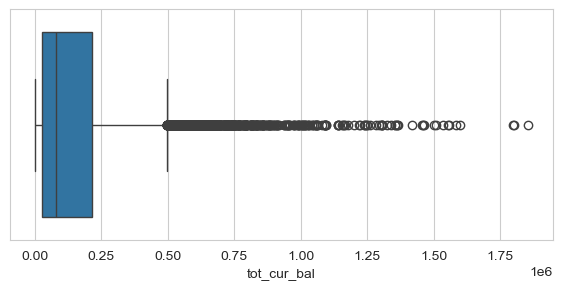

In [2946]:
Q1 = fintech_df["tot_cur_bal"].quantile(0.25)
Q3 = fintech_df["tot_cur_bal"].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')

plt.figure(figsize=(7, 3))
sns.boxplot(x=fintech_df['tot_cur_bal'])

print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

iqr_outliers_mask_tot_cur_bal = (fintech_df['tot_cur_bal'] < (Q1 - 1.5 * IQR)) | (fintech_df['tot_cur_bal'] > (Q3 + 1.5 * IQR))
iqr_outliers_tot_cur_bal = fintech_df[iqr_outliers_mask_tot_cur_bal]
print(f'Percentage of Outliers: {len(iqr_outliers_tot_cur_bal)/len(fintech_df)*100:.3f}%  count of rows :{len(iqr_outliers_tot_cur_bal)}')

tot cur balance has 3.47% of outliers

## Handling outliers

### function log_visualize
 compute the  log values to handle outliers and visualize histogram of original and logged values and also show boxplot and zscore graphs note that i add 1 before doing log bec if value 0 dont happen aproblem note that all the coloumns we have shouldnt contain negative values
### function calculate_outlier_bounds_and_cap
calculate the bounds of the IQR we should cap the values to and then cap and return the new coloumn values
### function cap_z_scores
do the sampe but based on z score where we cap after3 or before -3 and visualize the z score before and after

In [2947]:
def log_and_visualize(df, col):
    adjusted_col=df[col]
    # Check if there are non-positive values before applying log (as log can't handle zero or negative values)
    if (adjusted_col < 0).any():
        print(f"Column '{col}' contains non-positive values, log transformation skipped.")
        return None
    adjusted_col = df[col] + 1
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))


    log_col = np.log(adjusted_col)

    
    sns.histplot(df[col], ax=ax[0], kde=True)
    ax[0].set_title(f'Original {col}')

    sns.histplot(log_col, ax=ax[1], kde=True)
    ax[1].set_title(f'Log Transformed {col}')

    zscore_log_col = np.abs((log_col - log_col.mean()) / log_col.std())


    sns.histplot(zscore_log_col, kde=True, ax=ax[2])
    ax[2].set_title(f'Z-score Normalized Log {col}')

    sns.boxplot(x=log_col ,ax=ax[3])
    ax[3].set_title(f'Boxplot of Log {col}')

    plt.tight_layout()
    plt.show()

    return log_col, zscore_log_col

In [2948]:
def calculate_outlier_bounds_and_cap(df,values):
    # Calculate Q1, Q3, and IQR
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate IQR boundaries
    max_iqr = Q3 + 1.5 * IQR
    min_iqr = Q1 - 1.5 * IQR

    # Calculate the 5th and 95th percentiles
    q95 = values.quantile(0.95)
    q05 = values.quantile(0.05)

    # Print minimum and maximum values
    print(f'Min value in : {values.min()}')
    print(f'Max value in : {values.max()}')
    

    # Cap the values based on IQR boundaries
    capped = np.where(values > max_iqr, 
                                              max_iqr, 
                                              np.where(values < min_iqr, 
                                                       min_iqr, 
                                                       values))

    return capped, min_iqr, max_iqr, q05, q95

    

In [2949]:
def cap_z_scores(df, col, threshold=3):
    df_capped = df.copy()  # Create a copy of the dataframe
    
    # Calculate Z-scores for the column, keeping NaN values intact
    col_zscore = (df[col] - df[col].mean()) / df[col].std()
    
    # Apply capping based on the Z-score threshold
    df_capped[col] = np.where(col_zscore > threshold, 
                              df[col].mean() + threshold * df[col].std(),
                              np.where(col_zscore < -threshold, 
                                       df[col].mean() - threshold * df[col].std(), 
                                       df[col]))
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))



    
    sns.histplot(col_zscore, ax=ax[0], kde=True)
    ax[0].set_title(f'Original {col}')


    zscore_col = np.abs((df_capped[col] - df_capped[col].mean()) / df_capped[col].std())


    sns.histplot(zscore_col, kde=True, ax=ax[1])
    ax[1].set_title(f'Z-score Normalized after capping{col}')

    # sns.boxplot(x=df_capped[col] ,ax=ax[2])
    # ax[2].set_title(f'Boxplot of capping {col}')

    plt.tight_layout()
    plt.show()
    return df_capped

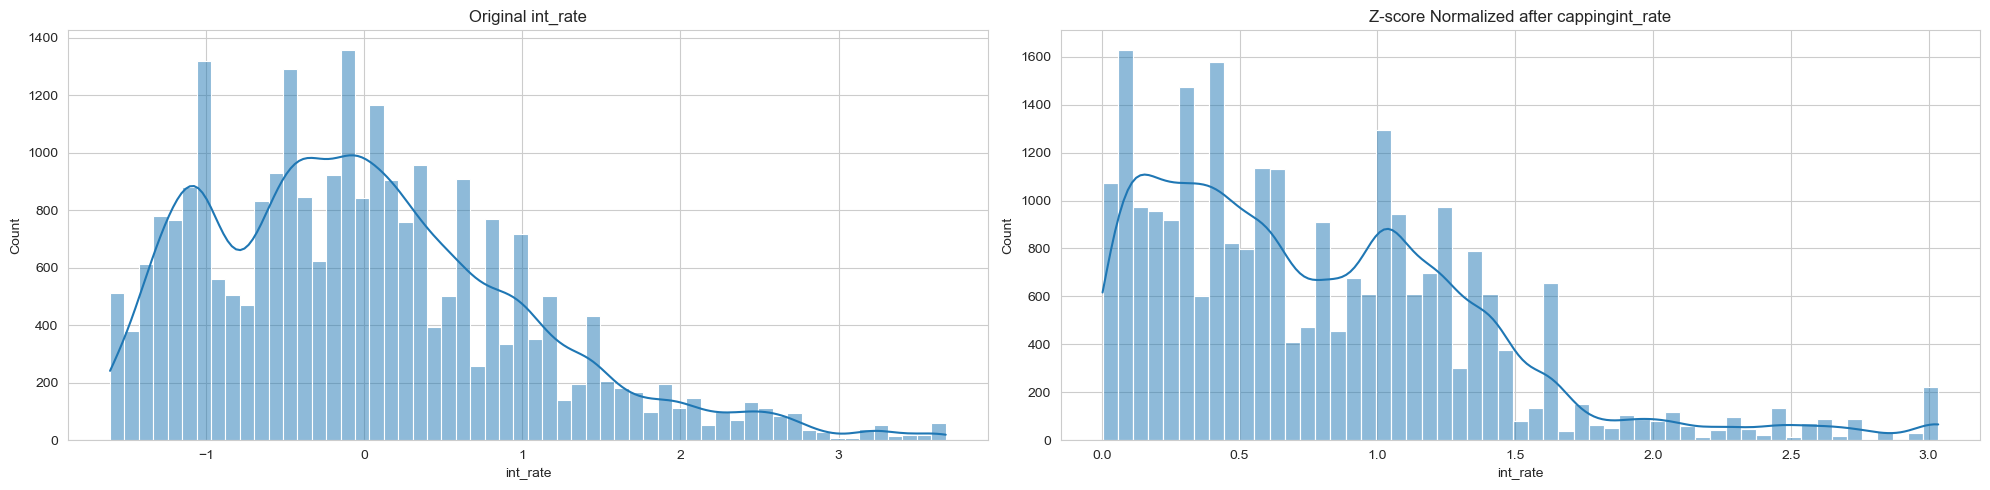

In [2950]:
df_capped = cap_z_scores(fintech_df, 'int_rate')


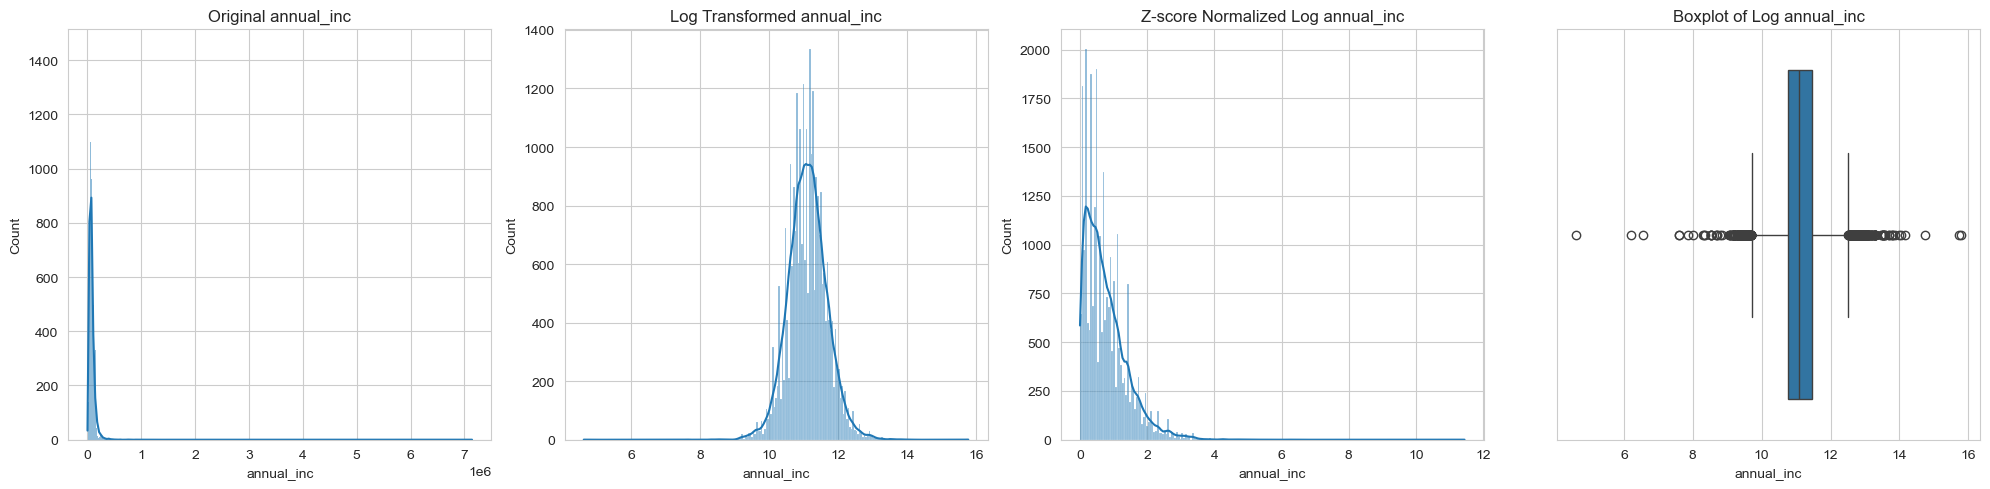

In [2951]:
log_annual_inc, zscore_log_annual_inc = log_and_visualize(fintech_df, 'annual_inc')

In [2952]:
capped_annual_inc,min_iqr, max_iqr, q05, q95=calculate_outlier_bounds_and_cap(fintech_df,log_annual_inc)
print(f'Min IQR: {min_iqr}, Max IQR: {max_iqr}, 5th Percentile: {q05}, 95th Percentile: {q95} , capped: {capped_annual_inc}')


Min value in : 4.61512051684126
Max value in : 15.781472462944519
Min IQR: 9.702346347389392, Max IQR: 12.51722050651527, 5th Percentile: 10.222035822101754, 95th Percentile: 12.034631608388654 , capped: [11.40757606 11.18443529 10.59665973 ... 12.51722051 10.62135174
  9.70234635]


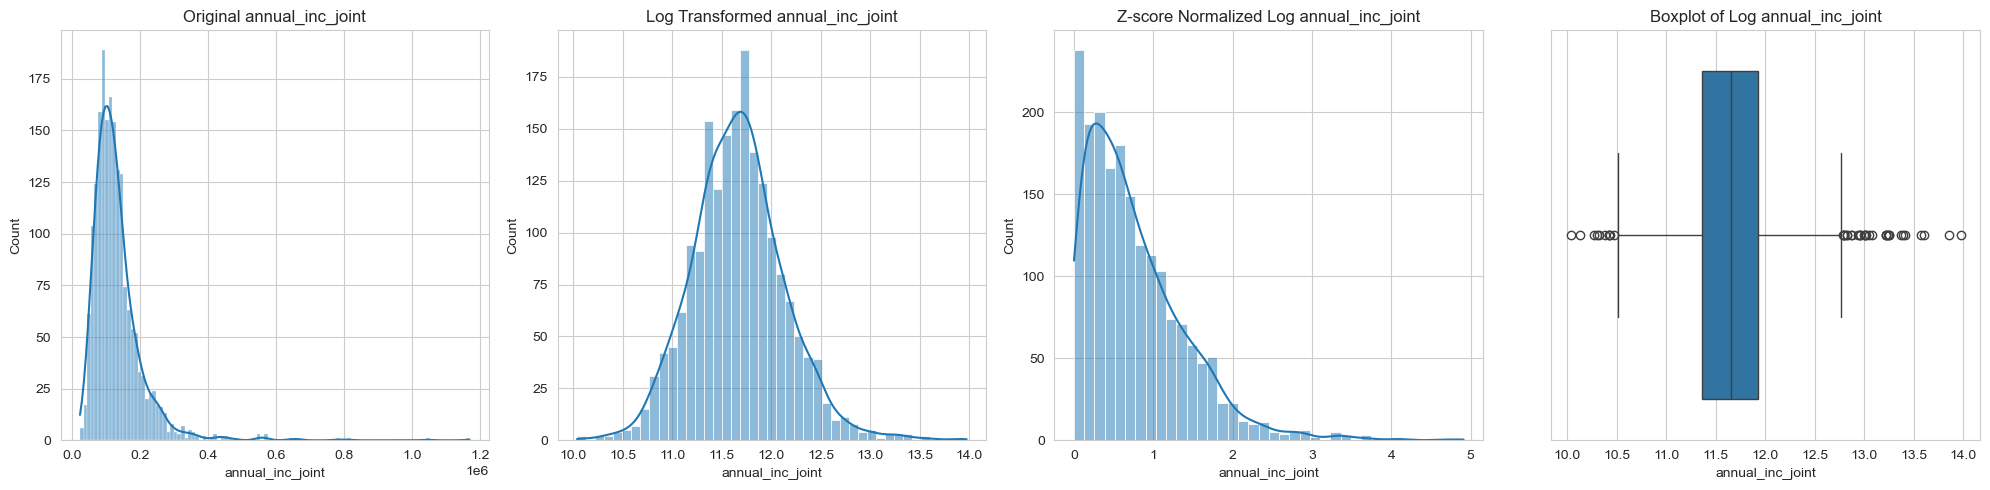

Min value in : 10.038935856711177
Max value in : 13.970804298534327
Min IQR: 10.51550413859337, Max IQR: 12.781325322850604, 5th Percentile: 10.936457510836759, 95th Percentile: 12.449022745701502 , capped: [        nan         nan         nan ...         nan         nan
 11.04402523]


In [2953]:
log_annual_inc_joint, zscore_log_annual_inc_joint = log_and_visualize(fintech_df, 'annual_inc_joint')
capped_annual_inc_joint,min_iqr, max_iqr, q05, q95=calculate_outlier_bounds_and_cap(fintech_df,log_annual_inc_joint)
print(f'Min IQR: {min_iqr}, Max IQR: {max_iqr}, 5th Percentile: {q05}, 95th Percentile: {q95} , capped: {capped_annual_inc_joint}')


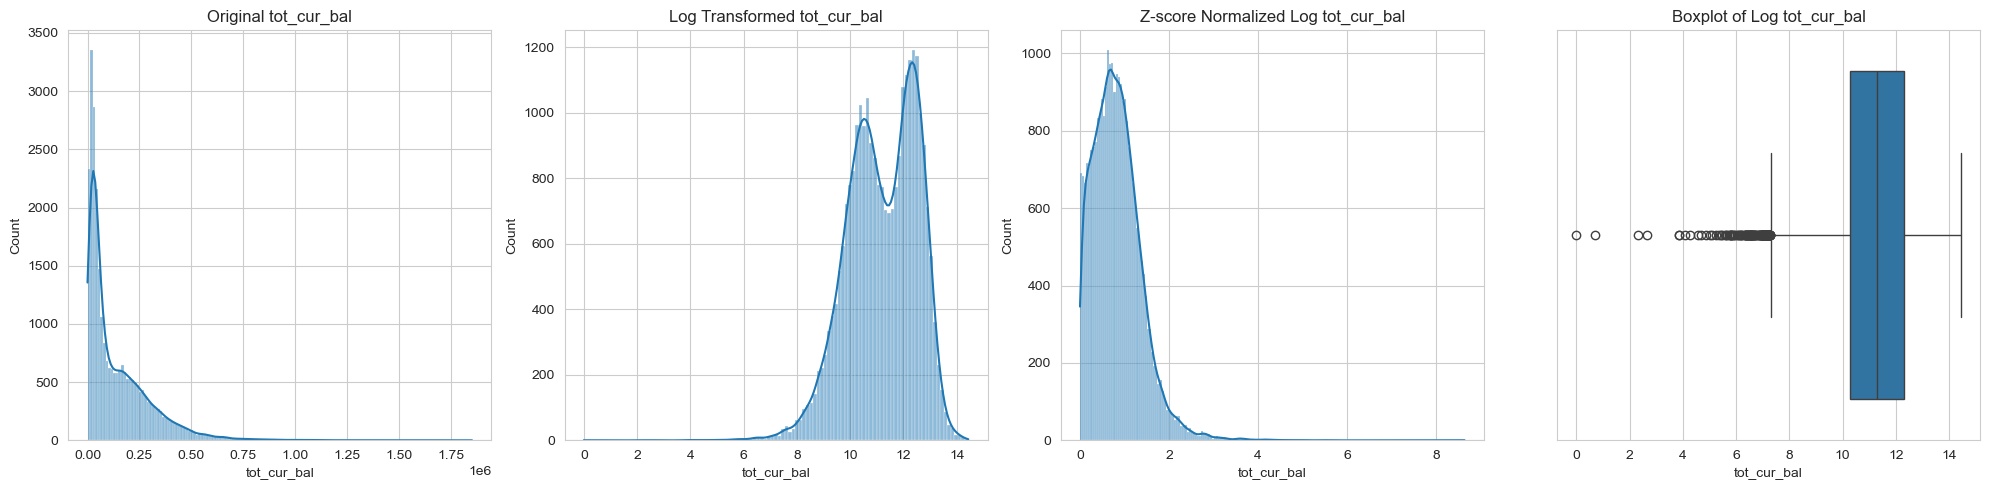

Min value in : 0.0
Max value in : 14.432628383234013
Min IQR: 7.287187537720529, Max IQR: 15.283996901150973, 5th Percentile: 9.040192413627507, 95th Percentile: 13.012428414081388 , capped: [12.72408935 10.42111996 11.85189458 ... 13.51041372 10.93594223
 11.61020643]


In [2954]:
log_tot_cur_bal, zscore_log_annual_inc_joint = log_and_visualize(fintech_df, 'tot_cur_bal')
capped_tot_cur_bal,min_iqr, max_iqr, q05, q95=calculate_outlier_bounds_and_cap(fintech_df,log_tot_cur_bal)
print(f'Min IQR: {min_iqr}, Max IQR: {max_iqr}, 5th Percentile: {q05}, 95th Percentile: {q95} , capped: {capped_tot_cur_bal}')

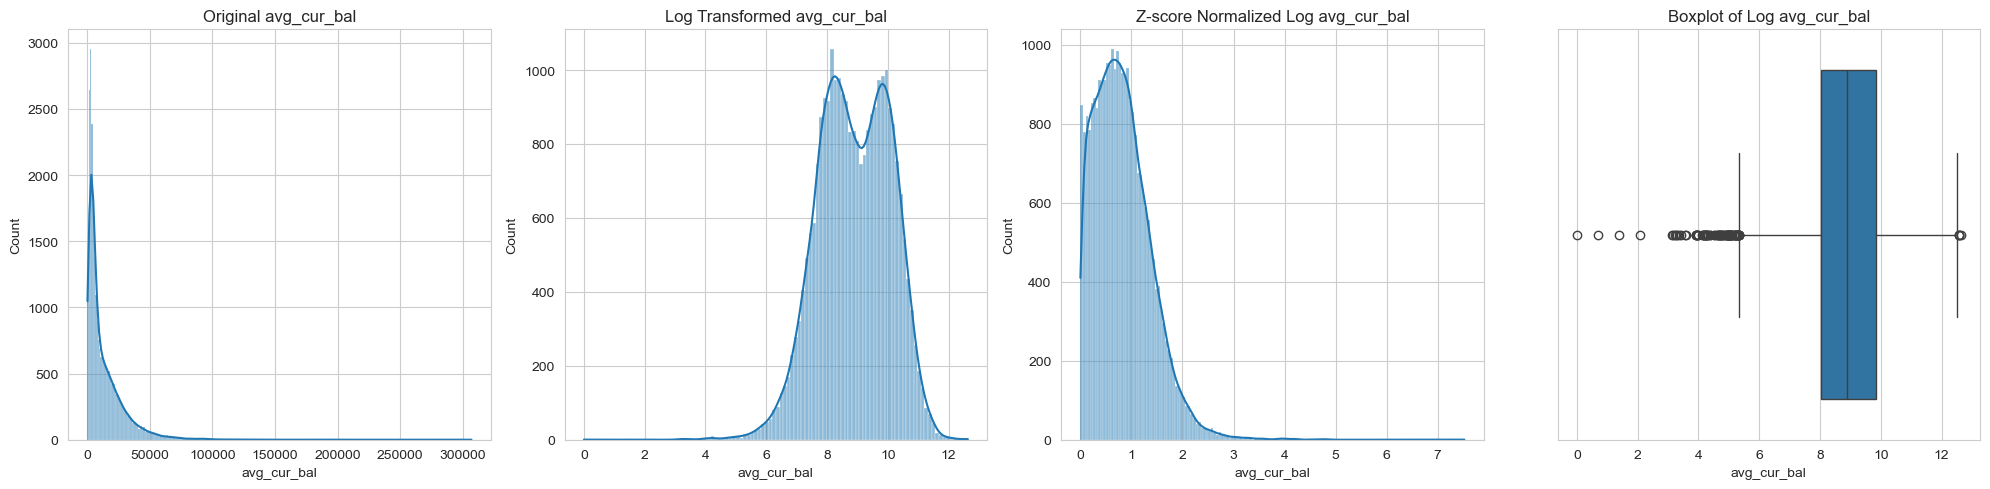

Min value in : 0.0
Max value in : 12.634984061458177
Min IQR: 5.3377109608116315, Max IQR: 12.541568106575912, 5th Percentile: 7.002155954403621, 95th Percentile: 10.68255091961603 , capped: [10.23920951  7.64921632  9.77252429 ... 10.67722345  8.99019233
  9.81847418]


In [2955]:
log_avg_cur_bal, zscore_log_annual_inc_joint = log_and_visualize(fintech_df, 'avg_cur_bal')
capped_avg_cur_bal,min_iqr, max_iqr, q05, q95=calculate_outlier_bounds_and_cap(fintech_df,log_avg_cur_bal)
print(f'Min IQR: {min_iqr}, Max IQR: {max_iqr}, 5th Percentile: {q05}, 95th Percentile: {q95} , capped: {capped_avg_cur_bal}')

In [2956]:
df_capped["annual_inc"]=capped_annual_inc
df_capped["annual_inc_joint"]=capped_annual_inc_joint
df_capped["tot_cur_bal"]=capped_tot_cur_bal
df_capped["avg_cur_bal"]=capped_avg_cur_bal

for annual income , annual joint income ,tot cur bal ,avg cur bal ---> i did log then cap to handle the outliers 
####
for interest rate ----> i just capped the values

## Findings and conclusions

### visualize  
plot  the z score and box plot after handling the outliers

In [2957]:
def vuslaize(col):
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    col= pd.Series(col)
    coldropped=col.dropna()
    sns.histplot(coldropped, ax=ax[0], kde=True)
    ax[0].set_title('column')

    zscore_col = np.abs((coldropped - coldropped.mean()) / coldropped.std())


    sns.histplot(zscore_col, kde=True, ax=ax[1])
    ax[1].set_title(f'Z-score Normalized')

    sns.boxplot(x=coldropped ,ax=ax[2])
    ax[2].set_title(f'Boxplot')

    plt.tight_layout()
    plt.show()


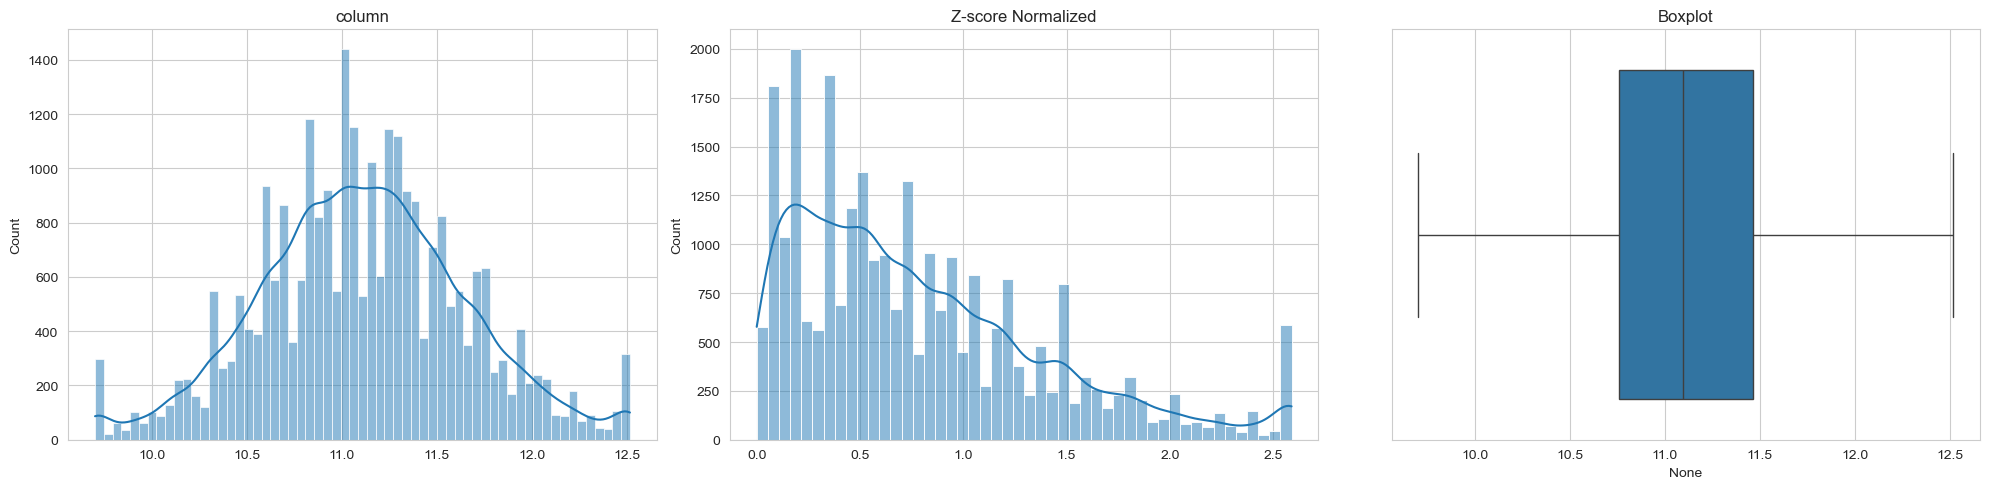

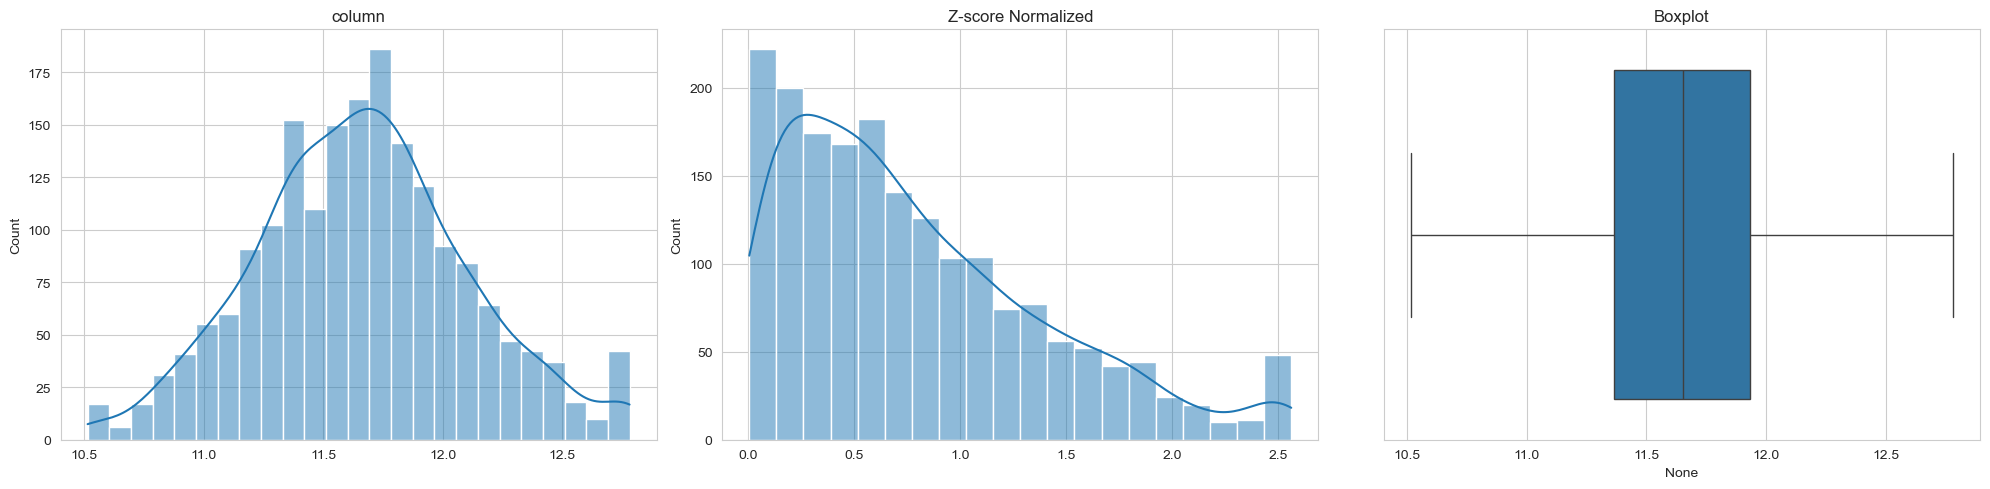

In [2958]:
vuslaize(capped_annual_inc)
vuslaize(capped_annual_inc_joint)

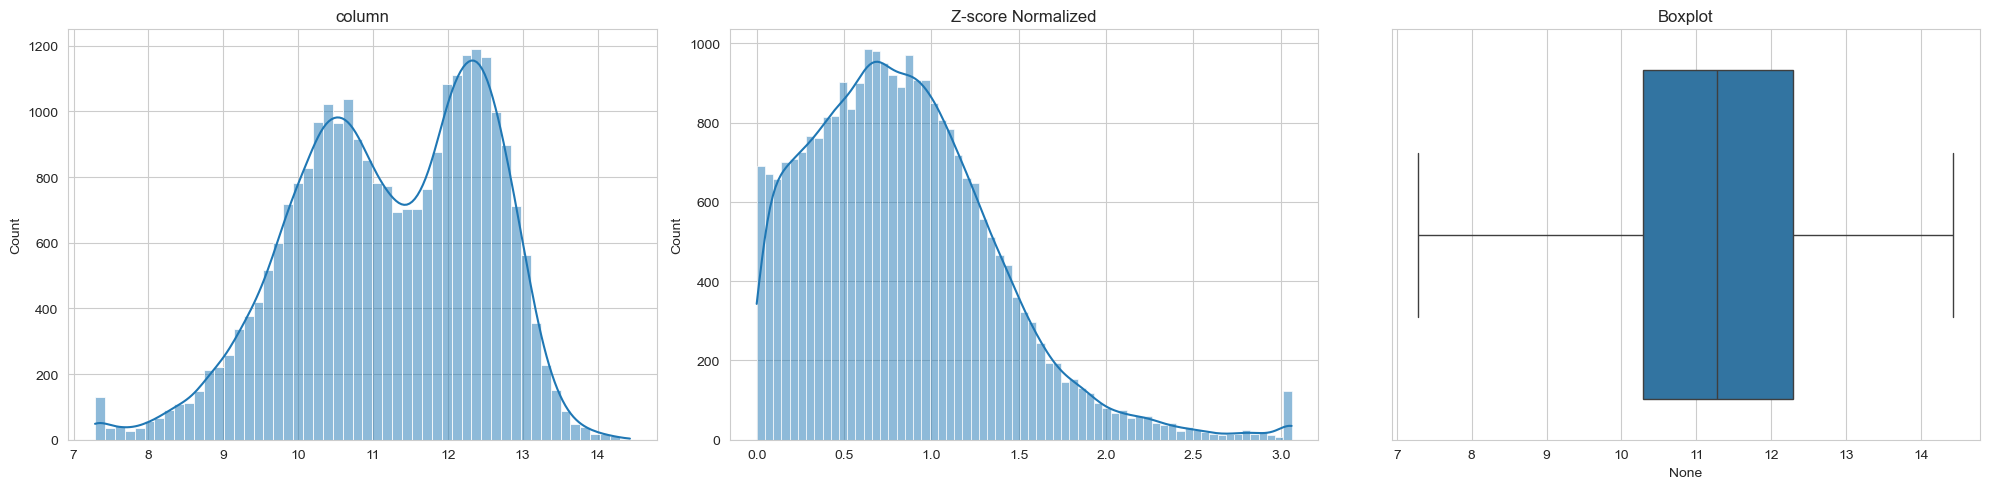

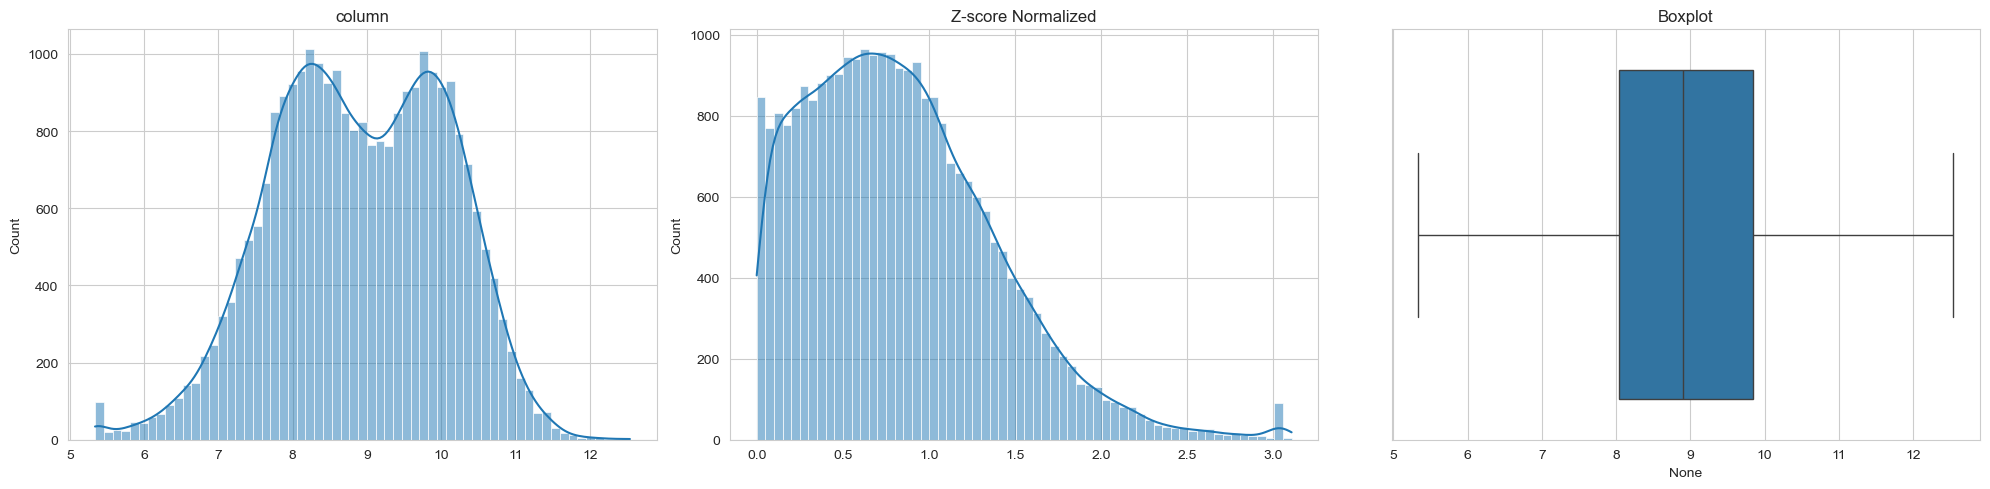

In [2959]:
vuslaize(capped_tot_cur_bal)
vuslaize(capped_avg_cur_bal)

as you see know all numeric coloumns dont have outliers 

## Observing Missing Data

### figure out missing values
 annual inc joint has very significant percentage of missing values,emp_title & emp_length has <10%  missing data and greater than 5 % 
 description has very low percentage of missing data
 int rate has lower than 5 % missing data
 

In [2960]:
sum_null = df_capped.isnull().sum()
perc_null_mean = df_capped.isnull().mean()*100
print(sum_null)
print('#'*40)
print(perc_null_mean)

customer_id                0
emp_title               2459
emp_length              1929
home_ownership             0
annual_inc                 0
annual_inc_joint       25151
verification_status        0
zip_code                   0
addr_state                 0
avg_cur_bal                0
tot_cur_bal                0
loan_status                0
loan_amount                0
state                      0
funded_amount              0
term                       0
int_rate                1249
grade                      0
issue_date                 0
pymnt_plan                 0
type                       0
purpose                    0
description              237
month                      0
term_no                    0
emp_length_no           1929
dtype: int64
########################################
customer_id             0.000000
emp_title               9.097636
emp_length              7.136779
home_ownership          0.000000
annual_inc              0.000000
annual_inc_joint       93.0

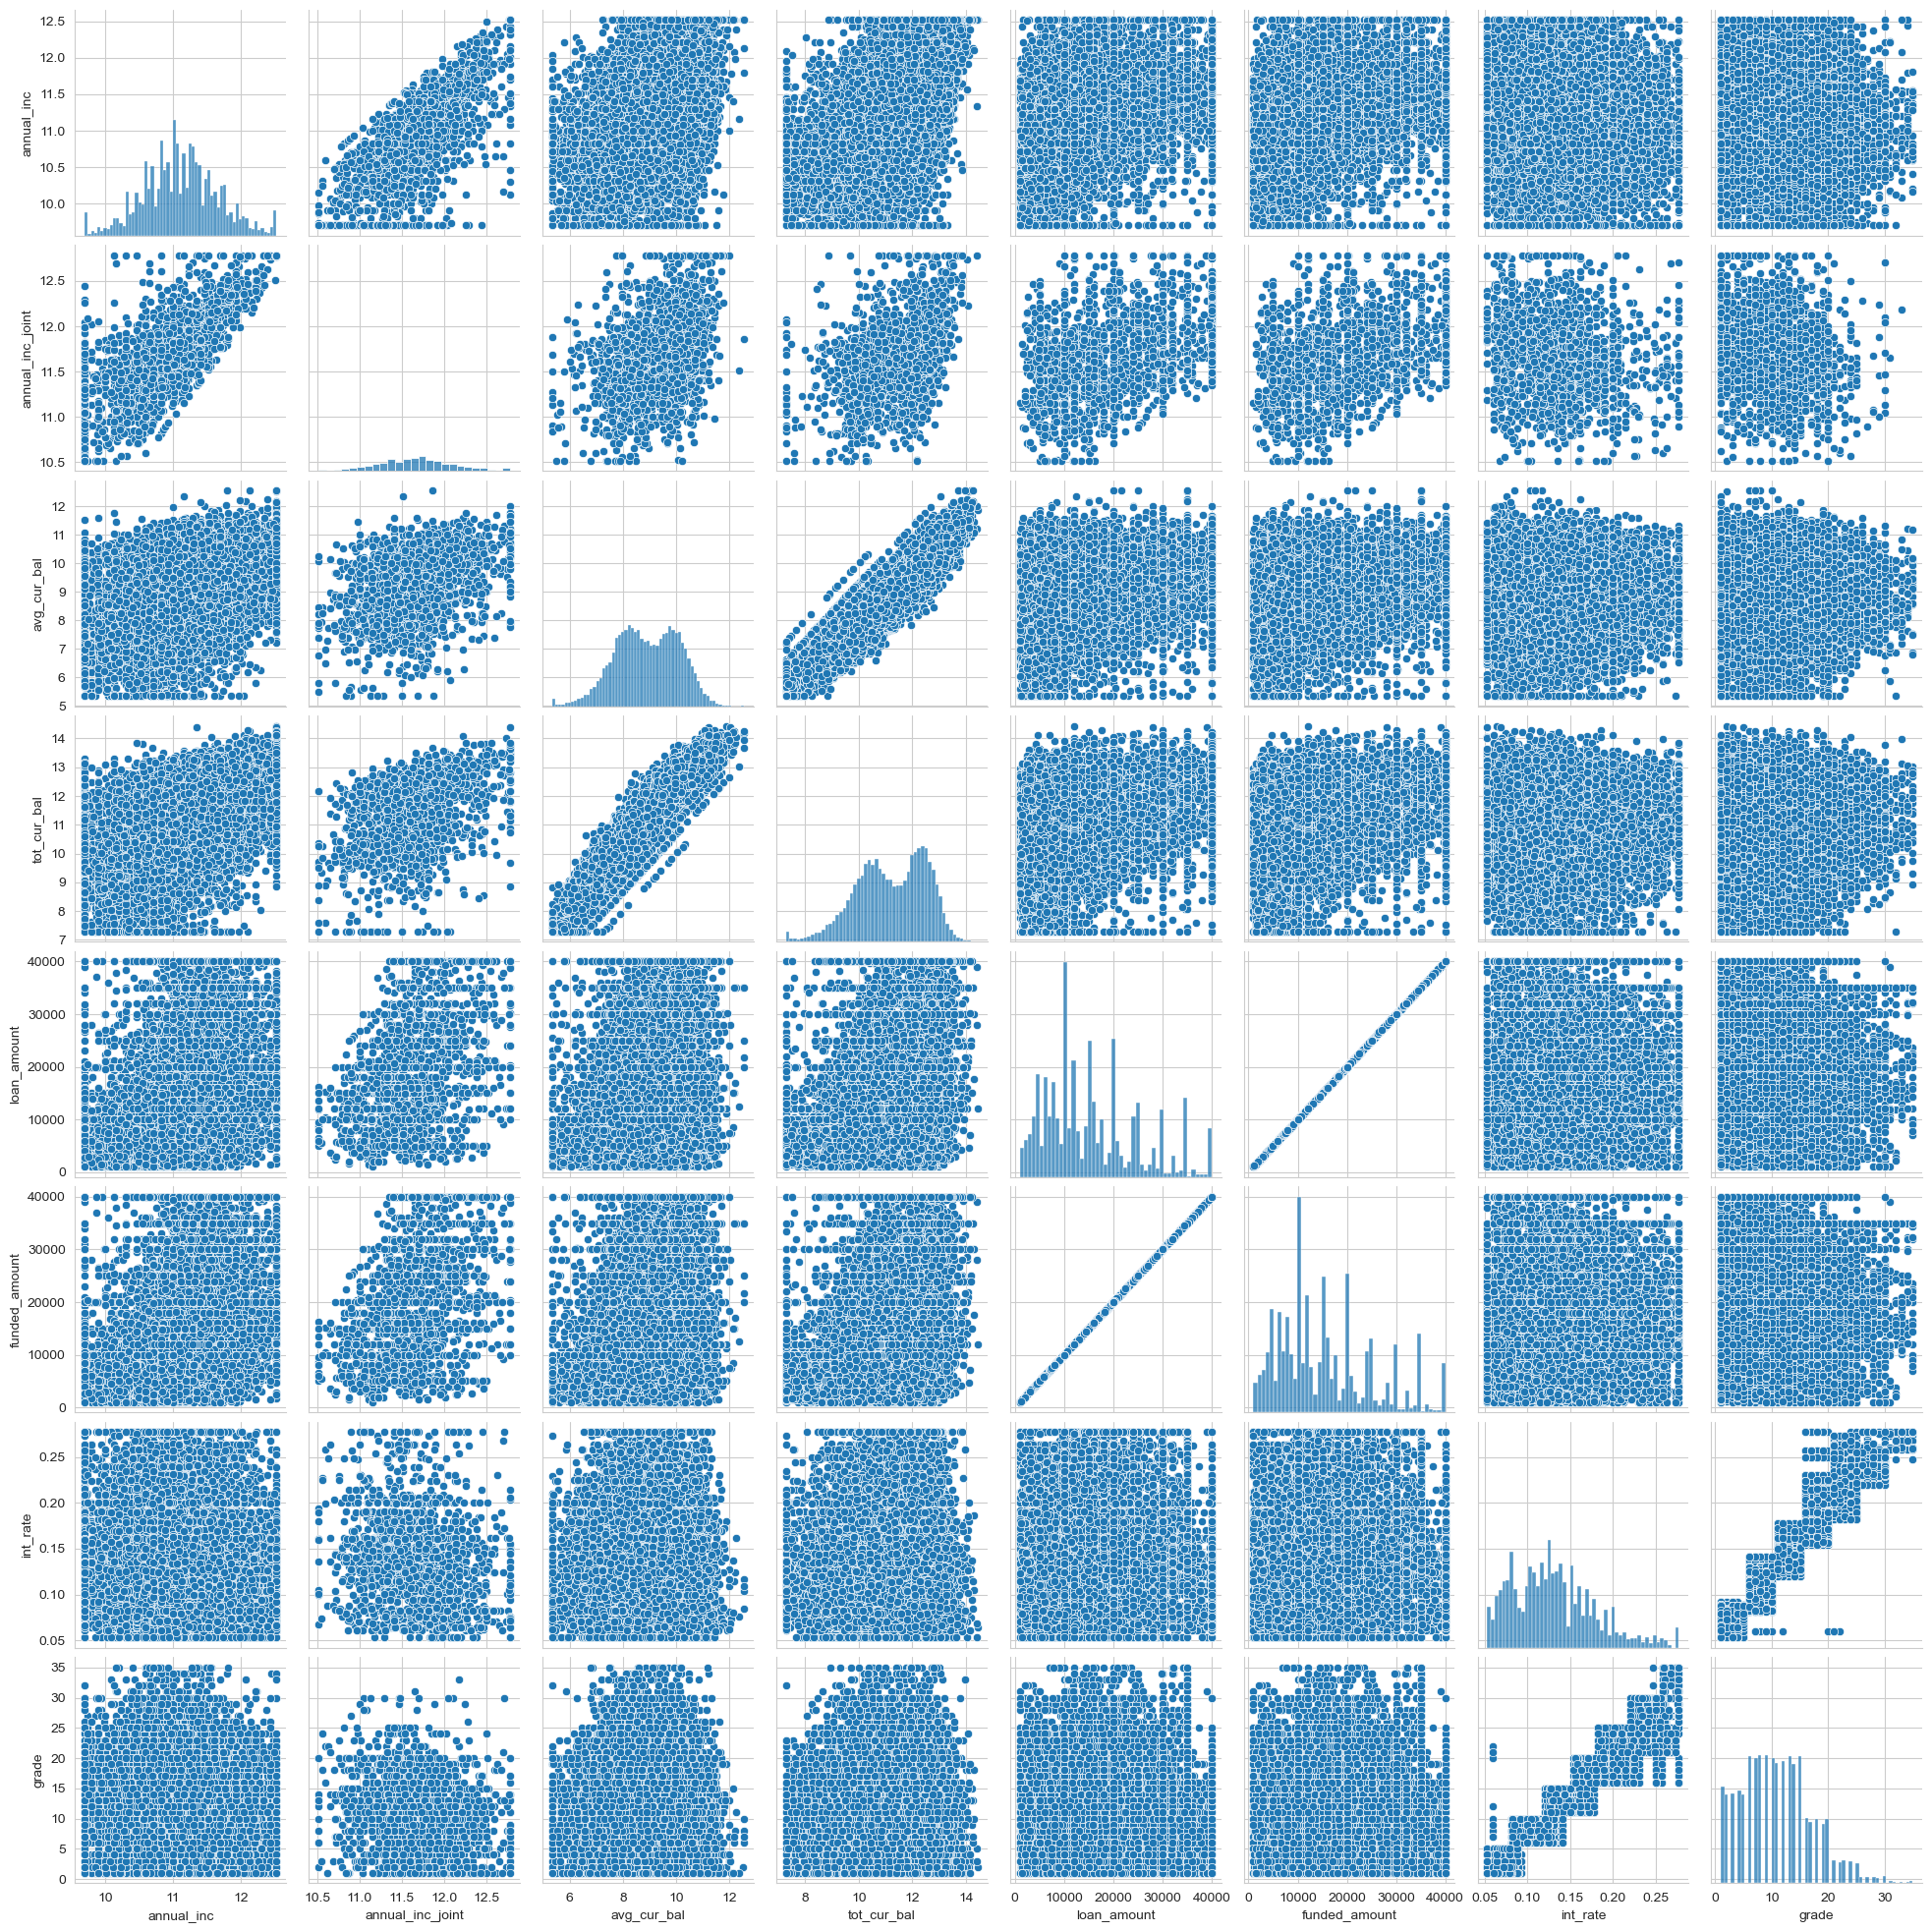

In [2961]:

numerical_columns = ['annual_inc', 'annual_inc_joint', 'avg_cur_bal', 'tot_cur_bal', 'loan_amount', 'funded_amount', 'int_rate','grade']
sns.pairplot(df_capped[numerical_columns])
plt.show()

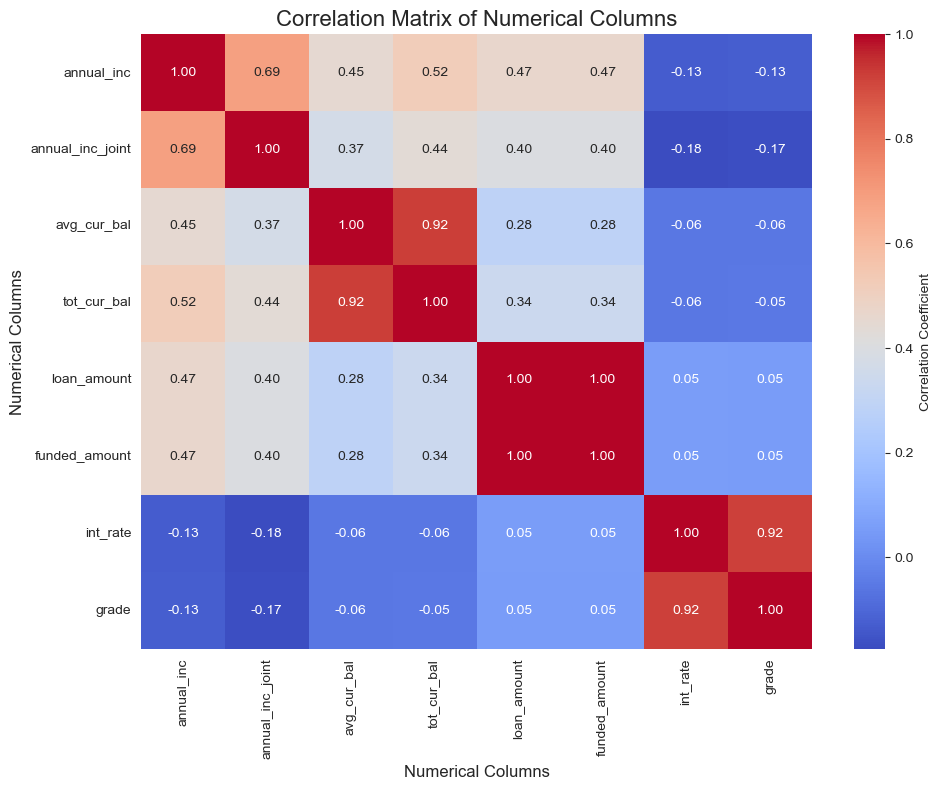

In [2962]:

correlation_matrix = df_capped[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Columns', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Numerical Columns', fontsize=12)

plt.tight_layout()
plt.show()


based on heat map and scatter plot the only high correlations 
grade with int_rate
fund with loan, 
avg cur bal with tot cur bal, 
annual inc with annual inc joint

### annual_inc_joint

In [2963]:
df_capped['annual_inc_joint'].isnull().groupby(df_capped['type']).mean()

type
direct_pay    1.0
individual    1.0
joint         0.0
Name: annual_inc_joint, dtype: float64

as you see the missing values here are related to the individuals and direct pay and values exist for only joint as this coloumn for them i suggest this is 
**it doesnt exist already!!**
we can compute from the annual inc as annual joint is the sum of the partners so if he doesnt have partner so it's his value only it will be handled in handling missing values section

### Description

In [2964]:
df_capped.groupby('purpose')['description'].apply(lambda x: x.isnull().mean())

purpose
car                   0.000000
credit_card           0.009506
debt_consolidation    0.009787
home_improvement      0.008567
house                 0.000000
major_purchase        0.005792
medical               0.006250
moving                0.000000
other                 0.000595
renewable_energy      0.000000
small_business        0.007905
vacation              0.016484
wedding               0.000000
Name: description, dtype: float64

In [2965]:
contingency_table = pd.crosstab(df_capped['purpose'], df_capped['description'].isnull())
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Test Statistic: {chi2:.2f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05  
if p_value < alpha:
    print(" Missingness in description is related to purpose .")
else:
    print(" Missingness in description is not related to purpose.")

Chi-Square Test Statistic: 22.33
p-value: 0.0340
 Missingness in description is related to purpose .


In [2966]:
df_capped.groupby('purpose')['description'].agg(
  missing_values=lambda x: x.isnull().sum()
)

missing_values
purpose                           
car                              0
credit_card                     61
debt_consolidation             150
home_improvement                15
house                            0
major_purchase                   3
medical                          2
moving                           0
other                            1
renewable_energy                 0
small_business                   2
vacation                         3
wedding                          0

The missingness of description is likely Missing At Random
 
**(MAR)**
 , where the probability of a missing value depends on the loan's purpose
we can compute the mode of the description grouped by purpose will do that in the next section

### Interest Rate


this chi-square test and ttest to calculate p value and chi-squre/ t values as ch-square/t inc and p<0.05 this means high correlation between missing values and thoose coloumns
the most reasonable here is the state the missing values in interest rate and its relation with state

In [2967]:
def analyze_missing_relationships(df, target_column):

  
    df['int_rate_missing'] = df[target_column].isnull().astype(int)
    
    # Store results
    chi_square_results = []
    ttest_results = []

    # Analyze categorical columns using Chi-Square Test
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if col != target_column:
            contingency_table = pd.crosstab(df['int_rate_missing'], df[col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi_square_results.append({'Column': col, 'Chi-Square': chi2, 'P-Value': p})

    # Analyze numerical columns using T-test or ANOVA
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != 'int_rate_missing' and col != target_column:
            # Split the data into groups based on missing int_rate
            missing_group = df[df['int_rate_missing'] == 1][col]
            not_missing_group = df[df['int_rate_missing'] == 0][col]

            # Perform T-test or ANOVA (ignoring NaN values)
            t_stat, p_value = stats.ttest_ind(missing_group, not_missing_group, nan_policy='omit')
            ttest_results.append({'Column': col, 'T-Statistic': t_stat, 'P-Value': p_value})

    chi_square_df = pd.DataFrame(chi_square_results)
    ttest_df = pd.DataFrame(ttest_results)

    return chi_square_df, ttest_df

chi_square_df, ttest_df = analyze_missing_relationships(df_capped, 'int_rate')

print("Chi-Square Test Results for Categorical Variables:")
print(chi_square_df)

print("\nT-Test Results for Numerical Variables:")
print(ttest_df)


Chi-Square Test Results for Categorical Variables:
                 Column    Chi-Square       P-Value
0           customer_id  27029.000000  4.971402e-01
1             emp_title  11804.284828  2.594933e-01
2            emp_length      7.305589  6.963148e-01
3        home_ownership     56.694715  2.985916e-12
4   verification_status      2.219748  3.296006e-01
5              zip_code   3600.947479  0.000000e+00
6            addr_state   3108.618159  0.000000e+00
7           loan_status      4.003445  6.762101e-01
8                 state   3108.618159  0.000000e+00
9                  term      3.423403  6.427837e-02
10                 type      2.330641  3.118226e-01
11              purpose     12.189424  4.305892e-01
12          description    888.489140  2.012373e-09
13                month      9.461923  5.793347e-01

T-Test Results for Numerical Variables:
             Column  T-Statistic   P-Value
0        annual_inc     2.404611  0.016196
1  annual_inc_joint     0.583708  0.559487

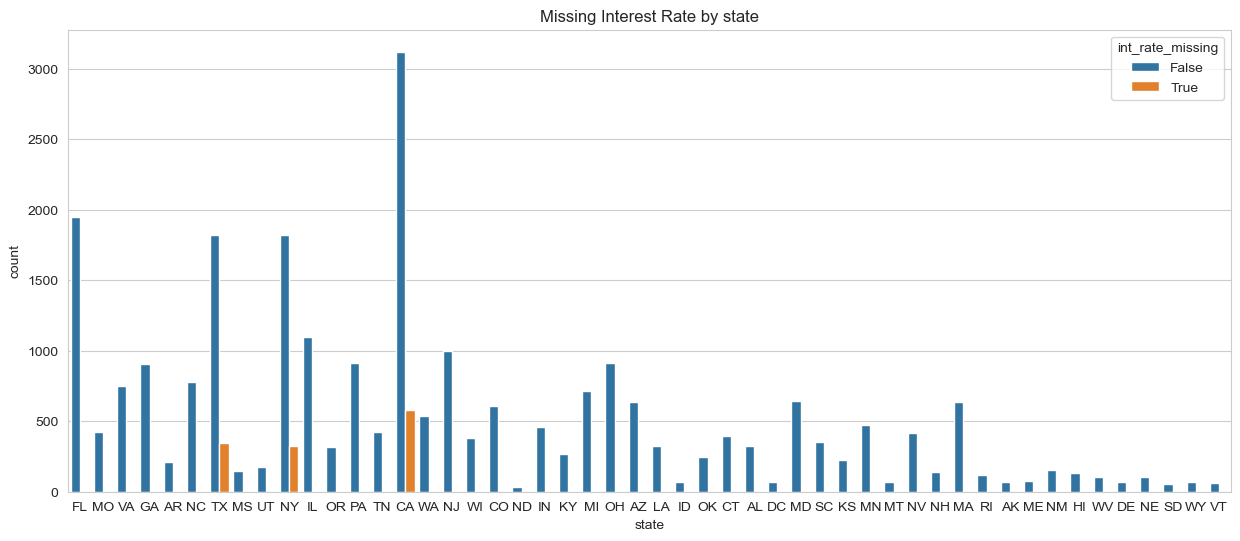

Chi-Square Statistic: 3108.6181586521293, P-Value: 0.0
Significant relationship between state and missing interest rate.


In [2968]:
df_capped['int_rate_missing'] = df_capped['int_rate'].isnull()

# Plot a barplot of home ownership against missing interest rate flag
plt.figure(figsize=(15, 6))
sns.countplot(x='state', hue='int_rate_missing', data=df_capped)
plt.title('Missing Interest Rate by state')
plt.show()
from scipy.stats import chi2_contingency

# Create a contingency table for home ownership and interest rate missingness
contingency_table = pd.crosstab(df_capped['state'], df_capped['int_rate_missing'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p < 0.05:
    print("Significant relationship between state and missing interest rate.")
else:
    print("No significant relationship between state and missing interest rate.")

In [2969]:
df_capped['int_rate'].isnull().groupby(df_capped['state']).mean()

state
AK    0.000000
AL    0.000000
AR    0.000000
AZ    0.000000
CA    0.156486
CO    0.000000
CT    0.000000
DC    0.000000
DE    0.000000
FL    0.000000
GA    0.000000
HI    0.000000
ID    0.000000
IL    0.000000
IN    0.000000
KS    0.000000
KY    0.000000
LA    0.000000
MA    0.000000
MD    0.000000
ME    0.000000
MI    0.000000
MN    0.000000
MO    0.000000
MS    0.000000
MT    0.000000
NC    0.000000
ND    0.000000
NE    0.000000
NH    0.000000
NJ    0.000000
NM    0.000000
NV    0.000000
NY    0.151445
OH    0.000000
OK    0.000000
OR    0.000000
PA    0.000000
RI    0.000000
SC    0.000000
SD    0.000000
TN    0.000000
TX    0.159133
UT    0.000000
VA    0.000000
VT    0.000000
WA    0.000000
WI    0.000000
WV    0.000000
WY    0.000000
Name: int_rate, dtype: float64

In [2970]:
df_capped.groupby('state')['int_rate'].agg(
  missing_values=lambda x: x.isnull().sum()
)

missing_values
state                
AK                  0
AL                  0
AR                  0
AZ                  0
CA                579
CO                  0
CT                  0
DC                  0
DE                  0
FL                  0
GA                  0
HI                  0
ID                  0
IL                  0
IN                  0
KS                  0
KY                  0
LA                  0
MA                  0
MD                  0
ME                  0
MI                  0
MN                  0
MO                  0
MS                  0
MT                  0
NC                  0
ND                  0
NE                  0
NH                  0
NJ                  0
NM                  0
NV                  0
NY                325
OH                  0
OK                  0
OR                  0
PA                  0
RI                  0
SC                  0
SD                  0
TN                  0
TX                345
UT                  0
VA                  0
VT                  0
WA                  0
WI                  0
WV                  0
WY                  0

interest Rate has only 3 states have missing values while other not its the same idea like women dont tell their weights while men do so interest rate is
**MAR**
the state is highly corrlated with the missing values of interest rate only 3 states has missing values while other states has no missing values
i suggest we can compute using mean based on the state and the grade of the loan as the interest rate has high +0.92 correlation with the the grade

### Employement length

In [2971]:
def analyze_missing_relationships(df, target_column):

  
    df['int_emp_length'] = df[target_column].isnull().astype(int)
    
    # Store results
    chi_square_results = []
    ttest_results = []

    # Analyze categorical columns using Chi-Square Test
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if col != target_column:
            contingency_table = pd.crosstab(df['int_emp_length'], df[col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi_square_results.append({'Column': col, 'Chi-Square': chi2, 'P-Value': p})

    # Analyze numerical columns using T-test or ANOVA
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != 'int_emp_length' and col != target_column:
            # Split the data into groups based on missing int_rate
            missing_group = df[df['int_emp_length'] == 1][col]
            not_missing_group = df[df['int_emp_length'] == 0][col]

            # Perform T-test or ANOVA (ignoring NaN values)
            t_stat, p_value = stats.ttest_ind(missing_group, not_missing_group, nan_policy='omit')
            ttest_results.append({'Column': col, 'T-Statistic': t_stat, 'P-Value': p_value})

    chi_square_df = pd.DataFrame(chi_square_results)
    ttest_df = pd.DataFrame(ttest_results)

    return chi_square_df, ttest_df

chi_square_df, ttest_df = analyze_missing_relationships(df_capped, 'emp_length')

print("Chi-Square Test Results for Categorical Variables:")
print(chi_square_df)

print("\nT-Test Results for Numerical Variables:")
print(ttest_df)


Chi-Square Test Results for Categorical Variables:
                 Column    Chi-Square        P-Value
0           customer_id  27029.000000   4.971402e-01
1             emp_title  17212.716414  2.030086e-218
2        home_ownership    221.214013   1.097195e-47
3   verification_status    538.399118  1.224946e-117
4              zip_code   1369.465173   1.095611e-26
5            addr_state    151.105346   2.424767e-12
6           loan_status     59.889969   4.738733e-11
7                 state    151.105346   2.424767e-12
8                  term     53.471048   2.624321e-13
9                  type     97.221675   7.737160e-22
10              purpose     35.412278   4.024847e-04
11          description    463.798395   1.000000e+00
12                month      9.783631   5.499485e-01

T-Test Results for Numerical Variables:
             Column  T-Statistic        P-Value
0        annual_inc   -37.654672  1.793618e-302
1  annual_inc_joint    -9.927734   1.130053e-22
2       avg_cur_bal   

Chi-Square Test Results:
Chi-Square Statistic: 803.127321034344
P-Value: 4.009757464359597e-175
annual_inc_cat
Low       0.131019
Medium    0.055756
High      0.026082
Name: emp_length_missing, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_8724\1213723169.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_emp_length_by_income = df_capped.groupby('annual_inc_cat')['emp_length_missing'].mean()


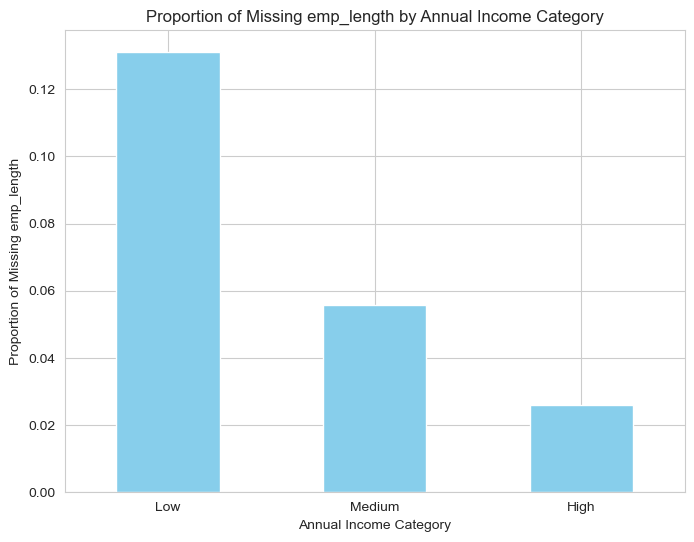

In [2972]:
#categorize annual inc to LOW,Medium,High
df_capped['annual_inc_cat'] = pd.qcut(df_capped['annual_inc'], q=3, labels=['Low', 'Medium', 'High'])

df_capped['emp_length_missing'] = df_capped['emp_length'].isnull()

#chi test if p<0.05 it has high correlation with mssing values suggest its MAR
contingency_table = pd.crosstab(df_capped['annual_inc_cat'], df_capped['emp_length_missing'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

#group by annual categories 
missing_emp_length_by_income = df_capped.groupby('annual_inc_cat')['emp_length_missing'].mean()
print(missing_emp_length_by_income)

#visualize the mean for each category
plt.figure(figsize=(8, 6))
missing_emp_length_by_income.plot(kind='bar', color='skyblue')
plt.xlabel('Annual Income Category')
plt.ylabel('Proportion of Missing emp_length')
plt.title('Proportion of Missing emp_length by Annual Income Category')
plt.xticks(rotation=0)
plt.show()

In [2973]:
df_capped.groupby('annual_inc_cat')['emp_length'].agg(
  missing_values=lambda x: x.isnull().sum()
)

C:\Users\hp\AppData\Local\Temp\ipykernel_8724\3333493751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_capped.groupby('annual_inc_cat')['emp_length'].agg(


missing_values
annual_inc_cat                
Low                       1200
Medium                     494
High                       235

Emp_length for the LOW annual inc is much greater than medium and high which suggest that its 
**MAR**
we can impute using the annual inc categories in next section

### Employement Title

In [2974]:
def analyze_missing_relationships(df, target_column):

  
    df['int_emp_length'] = df[target_column].isnull().astype(int)
    
    # Store results
    chi_square_results = []
    ttest_results = []

    # Analyze categorical columns using Chi-Square Test
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if col != target_column:
            contingency_table = pd.crosstab(df['int_emp_length'], df[col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi_square_results.append({'Column': col, 'Chi-Square': chi2, 'P-Value': p})

    # Analyze numerical columns using T-test or ANOVA
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != 'int_emp_length' and col != target_column:
            # Split the data into groups based on missing int_rate
            missing_group = df[df['int_emp_length'] == 1][col]
            not_missing_group = df[df['int_emp_length'] == 0][col]

            # Perform T-test or ANOVA (ignoring NaN values)
            t_stat, p_value = stats.ttest_ind(missing_group, not_missing_group, nan_policy='omit')
            ttest_results.append({'Column': col, 'T-Statistic': t_stat, 'P-Value': p_value})

    chi_square_df = pd.DataFrame(chi_square_results)
    ttest_df = pd.DataFrame(ttest_results)

    return chi_square_df, ttest_df

chi_square_df, ttest_df = analyze_missing_relationships(df_capped, 'emp_title')

print("Chi-Square Test Results for Categorical Variables:")
print(chi_square_df)

print("\nT-Test Results for Numerical Variables:")
print(ttest_df)


Chi-Square Test Results for Categorical Variables:
                 Column    Chi-Square        P-Value
0           customer_id  27029.000000   4.971402e-01
1            emp_length   2882.161253   0.000000e+00
2        home_ownership    239.512154   1.213396e-51
3   verification_status    465.506844  8.250365e-102
4              zip_code   1268.079383   7.967752e-19
5            addr_state    148.666729   5.639216e-12
6           loan_status    144.566395   1.088594e-28
7                 state    148.666729   5.639216e-12
8                  term     61.162081   5.256423e-15
9                  type    151.119806   1.530210e-33
10              purpose     35.682960   3.642682e-04
11          description    567.578715   9.929906e-01
12                month     35.770968   1.847313e-04
13       annual_inc_cat    592.498760  2.190428e-129

T-Test Results for Numerical Variables:
             Column  T-Statistic        P-Value
0        annual_inc   -31.172902  1.280861e-209
1  annual_inc_joi

Chi-Square Test Results:
Chi-Square Statistic: 592.4987599023943
P-Value: 2.190428189496307e-129
annual_inc_cat
Low       0.149361
Medium    0.071106
High      0.051165
Name: emp_title_missing, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_8724\314312541.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_emp_length_by_income = df_capped.groupby('annual_inc_cat')['emp_title_missing'].mean()


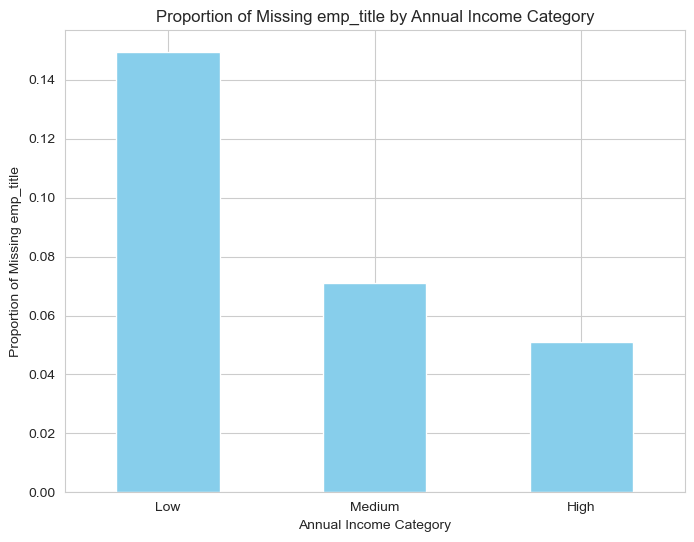

In [2975]:
#categorize annual inc to LOW,Medium,High

df_capped['emp_title_missing'] = df_capped['emp_title'].isnull()

#chi test if p<0.05 it has high correlation with mssing values suggest its MAR
contingency_table = pd.crosstab(df_capped['annual_inc_cat'], df_capped['emp_title_missing'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

#group by annual categories 
missing_emp_length_by_income = df_capped.groupby('annual_inc_cat')['emp_title_missing'].mean()
print(missing_emp_length_by_income)

#visualize the mean for each category
plt.figure(figsize=(8, 6))
missing_emp_length_by_income.plot(kind='bar', color='skyblue')
plt.xlabel('Annual Income Category')
plt.ylabel('Proportion of Missing emp_title')
plt.title('Proportion of Missing emp_title by Annual Income Category')
plt.xticks(rotation=0)
plt.show()

In [2976]:
df_capped.groupby('annual_inc_cat')['emp_title'].agg(
  missing_values=lambda x: x.isnull().sum()
)

C:\Users\hp\AppData\Local\Temp\ipykernel_8724\749072313.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_capped.groupby('annual_inc_cat')['emp_title'].agg(


missing_values
annual_inc_cat                
Low                       1368
Medium                     630
High                       461

emp_title 
is same as emp_length so 
**MAR**
will compute innext section by the mode across annual categories

## Handling Missing data

In [2977]:
df_missing=df_capped.copy()

for annual inc joint we impute from annual inc if value is NaN else put the original value

In [2978]:
df_missing['annual_inc_joint'] = df_missing['annual_inc_joint'].fillna(df_missing['annual_inc'])

# Verify that there are no remaining missing values in 'annual_inc_joint'
missing_count_after = df_missing['annual_inc_joint'].isnull().sum()
print(f'Missing annual_inc_joint after imputation: {missing_count_after}')

Missing annual_inc_joint after imputation: 0


for description , each category of purpose we get the mode of description in this categroy and then for each value null in description we imputed by the value of mode for the catgroy of purpose

In [2979]:
df_copy = df_missing.copy()


purpose_mode_description = df_copy.groupby('purpose')['description'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)


df_missing = df_missing.merge(purpose_mode_description.rename('mode_description'), on='purpose', how='left')

df_missing['description'] = df_missing['description'].fillna(df_missing['mode_description'])

df_missing.drop('mode_description', axis=1, inplace=True)


df_missing.index = df_copy.index


missing_count_after = df_missing['description'].isnull().sum()
print(f'Missing description count after imputation: {missing_count_after}')


Missing description count after imputation: 0


for interest rate we imputed using state and grade if exist or state only if there is no combination before , missing values are related to specific states here is only 3 and grade and interest rate has high correlation

In [2980]:
df_copy = df_missing.copy()

mean_int_rate_state_grade = df_copy.groupby(['state', 'grade'])['int_rate'].mean().reset_index()
mean_int_rate_state_grade.rename(columns={'int_rate': 'mean_int_rate_state_grade'}, inplace=True)

df_missing = df_missing.merge(mean_int_rate_state_grade, on=['state', 'grade'], how='left')

df_missing['int_rate'] = df_missing['int_rate'].fillna(df_missing['mean_int_rate_state_grade'])

mean_int_rate_state = df_copy.groupby('state')['int_rate'].mean().reset_index()
mean_int_rate_state.rename(columns={'int_rate': 'mean_int_rate_state'}, inplace=True)

df_missing = df_missing.merge(mean_int_rate_state, on='state', how='left')

df_missing['int_rate'] = df_missing['int_rate'].fillna(df_missing['mean_int_rate_state'])

df_missing.drop(['mean_int_rate_state_grade', 'mean_int_rate_state'], axis=1, inplace=True)

df_missing.index = df_copy.index

missing_count_after = df_missing['int_rate'].isnull().sum()
print(f'Missing interest rates after imputation: {missing_count_after}')
print(df_missing[['state', 'grade', 'int_rate']].head(10))


Missing interest rates after imputation: 0
        state  grade  int_rate
loan_id                       
70935      FL      4    0.0881
63172      MO      1    0.0789
14799      VA     18    0.1806
259816     GA     11    0.1531
191729     FL      7    0.1049
10274      AR      6    0.1139
35780      NC     23    0.1924
148966     TX      7    0.0944
93464      VA     13    0.1262
27812      MS     10    0.0944


for emp_length and title we impute based on annual inc categories mode

In [2981]:
df_copy = df_missing.copy()
original_index = df_missing.index

mode_values = df_copy.groupby('annual_inc_cat').agg({
    'emp_length': pd.Series.mode,
    'emp_title': pd.Series.mode
}).reset_index()

df_missing = df_missing.merge(
    mode_values,
    on='annual_inc_cat',
    how='left',
    suffixes=('', '_mode')
)

df_missing['emp_length'] = df_missing['emp_length'].fillna(df_missing['emp_length_mode'])
df_missing['emp_title'] = df_missing['emp_title'].fillna(df_missing['emp_title_mode'])

df_missing.drop(columns=['emp_length_mode', 'emp_title_mode'], inplace=True)

df_missing['emp_length'] = df_missing['emp_length'].copy()
df_missing['emp_title'] = df_missing['emp_title'].copy()

df_missing.index = original_index

missing_emp_length = df_missing['emp_length'].isnull().sum()
missing_emp_title = df_missing['emp_title'].isnull().sum()

print(f'Missing emp_length after imputation: {missing_emp_length}')
print(f'Missing emp_title after imputation: {missing_emp_title}')

print(df_missing[['annual_inc', 'annual_inc_cat', 'emp_length', 'emp_title']].head(10))


Missing emp_length after imputation: 0
Missing emp_title after imputation: 0
         annual_inc annual_inc_cat emp_length  \
loan_id                                         
70935     11.407576           High  10+ years   
63172     11.184435         Medium    4 years   
14799     10.596660            Low    2 years   
259816    11.695255           High    3 years   
191729    10.915107         Medium    8 years   
10274     10.463132            Low     1 year   
35780      9.702346            Low  10+ years   
148966    11.542494           High    6 years   
93464     11.141876         Medium    4 years   
27812     11.225257         Medium  10+ years   

                                emp_title  
loan_id                                    
70935                         underwrirer  
63172            regional sales executive  
14799               library specialist ii  
259816                           attorney  
191729                              owner  
10274                     

C:\Users\hp\AppData\Local\Temp\ipykernel_8724\996096874.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_values = df_copy.groupby('annual_inc_cat').agg({


## Findings and conclusions

<Axes: xlabel='int_rate', ylabel='Density'>

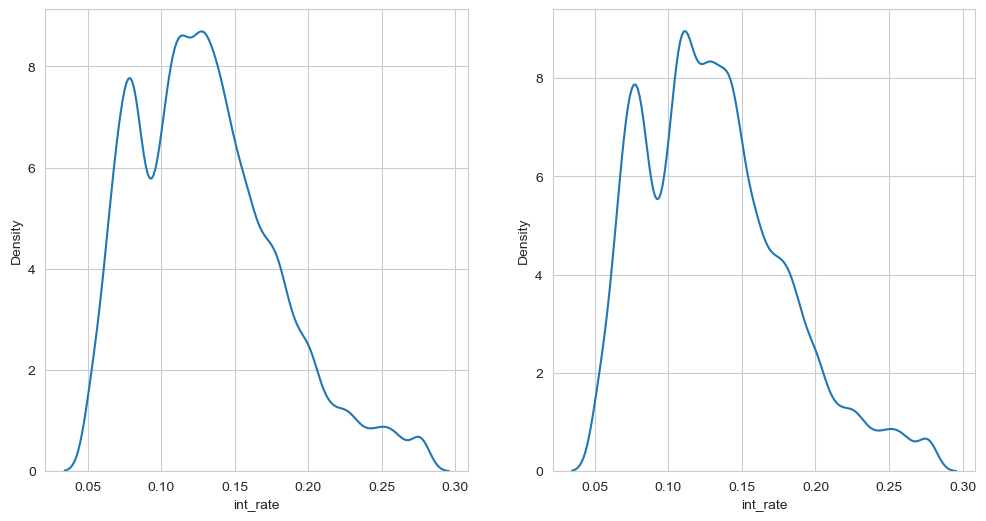

In [2982]:
#plot 2 histograms to compare the original and imputed interest rate
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(df_capped["int_rate"], ax=ax[0])
sns.kdeplot(df_missing["int_rate"], ax=ax[1])

In [2983]:
df_missing["emp_length"].isnull().sum()
df_missing["int_rate"].isnull().sum()

0

<Axes: xlabel='annual_inc_joint', ylabel='Density'>

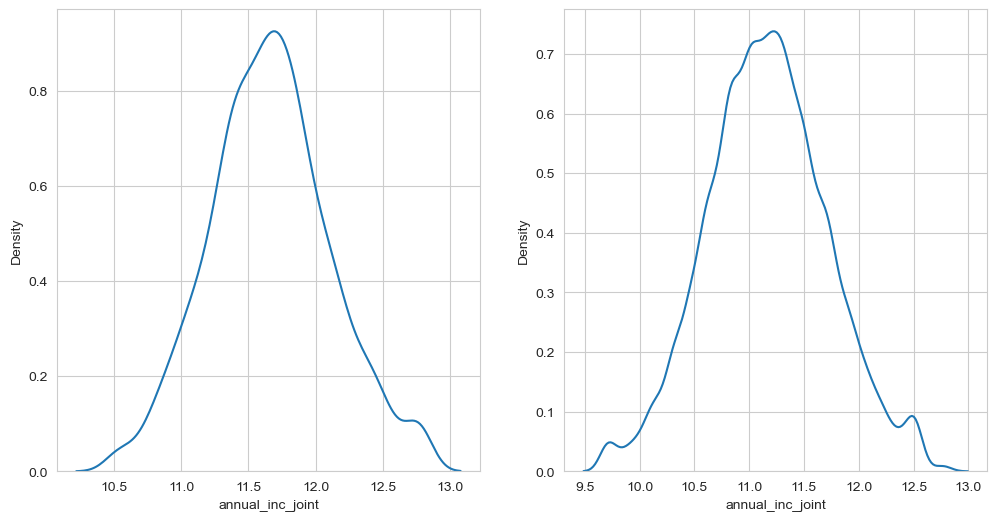

In [2984]:
#plot 2 histograms to compare the original and imputed annual_inc_joint
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(df_capped["annual_inc_joint"], ax=ax[0])
sns.kdeplot(df_missing["annual_inc_joint"], ax=ax[1])

<Axes: xlabel='count', ylabel='emp_length'>

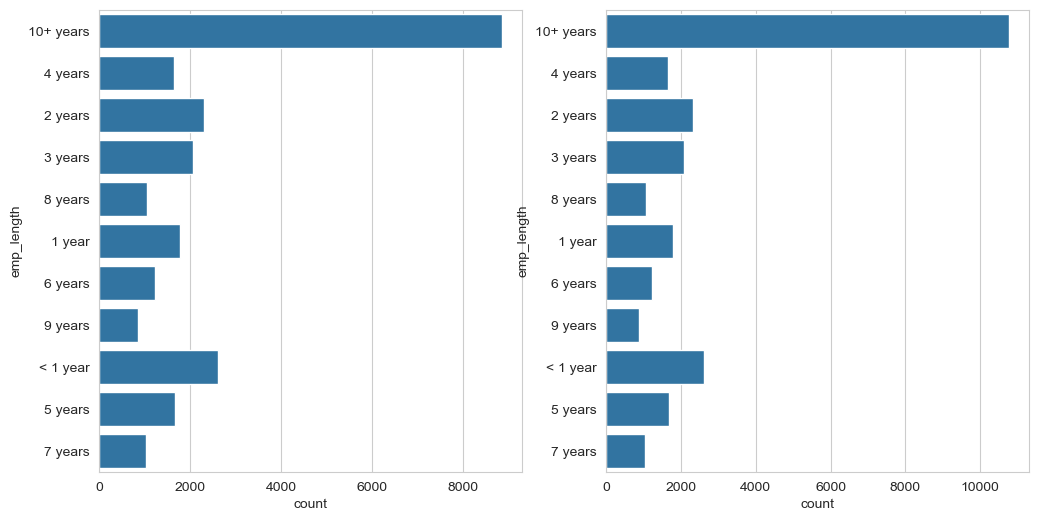

In [2985]:
#plot 2 countplot to compare the original and imputed emp_length
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(df_capped["emp_length"], ax=ax[0])
sns.countplot(df_missing["emp_length"], ax=ax[1])

after handling the missing values in emp_length i had to update emp_length_no

In [2986]:
emp_length_mapping = {
    '< 1 year': 0,  
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10  
}
df_missing["emp_length_no"] = df_missing["emp_length"].map(emp_length_mapping)

In [2987]:
columns_to_keep = [
    'customer_id', 
    'emp_title', 
    'emp_length', 
    'home_ownership', 
    'annual_inc', 
    'annual_inc_joint', 
    'verification_status', 
    'zip_code', 
    'addr_state', 
    'avg_cur_bal', 
    'tot_cur_bal', 
    'loan_status', 
    'loan_amount', 
    'state', 
    'funded_amount', 
    'term', 
    'int_rate', 
    'grade', 
    'issue_date', 
    'pymnt_plan', 
    'type', 
    'purpose', 
    'description',
    'term_no',
    'emp_length_no'
]


df_missing = df_missing.loc[:, columns_to_keep]

df_missing.head()


customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  
loan_id                 
70935               10  
63172                4  
14799                2  
259816               3  
191729               8

# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

In [2988]:
df_feature_engineering=df_missing.copy()
df_feature_engineering["issue_date"]=df_feature_engineering["issue_date"].astype("datetime64[s]")
df_feature_engineering["month_no"]=df_feature_engineering["issue_date"].dt.month
df_feature_engineering["month_no"].dtype
df_feature_engineering.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  
loan_id                           
70935               10         1  
63172                4         7  
14799                2         7  
259816               3         2  
191729               8         7

i use original values if  type joint use joint else use the annual inc 

In [2989]:
df_feature_engineering["salary_can_cover"] = np.where(
    fintech_df["type"] == "joint",
    fintech_df["annual_inc_joint"] >= fintech_df["loan_amount"],
    fintech_df["annual_inc"] >= fintech_df["loan_amount"]
) 
df_feature_engineering["salary_can_cover"].dtype
df_feature_engineering.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover  
loan_id                                             
70935               10         1              True  
63172                4         7              True  
14799                2         7              True  
259816               3         2              True  
191729               8         7              True

In [2990]:
conditions = [
    (df_feature_engineering["grade"] >= 1) & (df_feature_engineering["grade"] <= 5),
    (df_feature_engineering["grade"] >= 6) & (df_feature_engineering["grade"] <= 10),
    (df_feature_engineering["grade"] >= 11) & (df_feature_engineering["grade"] <= 15),
    (df_feature_engineering["grade"] >= 16) & (df_feature_engineering["grade"] <= 20),
    (df_feature_engineering["grade"] >= 21) & (df_feature_engineering["grade"] <= 25),
    (df_feature_engineering["grade"] >= 26) & (df_feature_engineering["grade"] <= 30),
    (df_feature_engineering["grade"] >= 31) & (df_feature_engineering["grade"] <= 35)
]

# Define corresponding values
values = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Assign values based on conditions
df_feature_engineering["letter_grade"] = np.select(conditions, values, default='A')
df_feature_engineering.head()


customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover letter_grade  
loan_id                                                          
70935               10         1              True            A  
63172                4         7              True            A  
14799                2         7              True            D  
259816               3         2              True            C  
191729               8         7              True            B

In [2991]:
r=(df_missing["int_rate"]/12)
r_plus1=r+1
no_of_months=np.where(fintech_df["term"]=="36 months",36,60)
df_feature_engineering["monthly_installement"]=fintech_df["loan_amount"]*(np.power(r_plus1,no_of_months)*r)/(np.power(r_plus1,no_of_months)-1)
df_feature_engineering.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover letter_grade  \
loan_id                                                           
70935               10         1              True            A   
63172                4         7              True            A   
14799                2         7              True            D   
259816               3         2              True            C   
191729               8         7              True            B   

         monthly_installement  
loan_id                        
70935              173.596615  
63172              161.790328  
14799               88.991275  
259816             838.353686  
191729             429.778938

## 4.2 - Encoding

encode home ownership & verification status using hot label encoder beacause they have small no of varaibles and dont follow order

In [2992]:
df_encoded=df_feature_engineering.copy()

encoder_home = OneHotEncoder(sparse_output=False)
encoded = encoder_home.fit_transform(df_encoded[['home_ownership']])
encoded_df = pd.DataFrame(encoded, columns=encoder_home.get_feature_names_out(['home_ownership']),index=df_encoded.index)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover letter_grade  \
loan_id                                                           
70935               10         1              True            A   
63172                4         7              True            A   
14799                2         7              True            D   
259816               3         2              True            C   
191729               8         7              True            B   

         monthly_installement  home_ownership_any  home_ownership_mortgage  \
loan_id                                                                      
70935              173.596615                 0.0                      1.0   
63172              161.790328                 0.0                      0.0   
14799               88.991275                 0.0                      0.0   
259816             838.353686                 0.0                      1.0   
191729             429.778938                 0.0                      0.0   

         home_ownersh

In [2993]:

encoder_verification_status = OneHotEncoder(sparse_output=False)
encoded = encoder_verification_status.fit_transform(df_encoded[['verification_status']])
encoded_df = pd.DataFrame(encoded, columns=encoder_verification_status.get_feature_names_out(['verification_status']),index=df_encoded.index)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

df_encoded.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover letter_grade  \
loan_id                                                           
70935               10         1              True            A   
63172                4         7              True            A   
14799                2         7              True            D   
259816               3         2              True            C   
191729               8         7              True            B   

         monthly_installement  home_ownership_any  home_ownership_mortgage  \
loan_id                                                                      
70935              173.596615                 0.0                      1.0   
63172              161.790328                 0.0                      0.0   
14799               88.991275                 0.0                      0.0   
259816             838.353686                 0.0                      1.0   
191729             429.778938                 0.0                      0.0   

         home_ownersh

state and addr state has 50 unique values so  label encoding will be better too

In [2994]:
df_encoded["addr_state"].nunique()
encoder_addr_state = LabelEncoder()
df_encoded['addr_state_encoded'] = encoder_addr_state.fit_transform(df_encoded['addr_state'])
df_encoded[['addr_state', 'addr_state_encoded']].sample(5)



addr_state  addr_state_encoded
loan_id                               
57202           IL                  13
55807           MD                  19
114992          PA                  37
47880           PA                  37
20507           FL                   9

In [2995]:
df_encoded["state"].nunique()
encoder_state = LabelEncoder()
df_encoded['state_encoded'] = encoder_state.fit_transform(df_encoded['state'])
df_encoded[['state', 'state_encoded']].sample(5)

state  state_encoded
loan_id                     
264776     TN             41
216679     CA              4
116124     TX             42
151184     TX             42
236534     TX             42

loan status has 7 values not so high so we can use hot label encoding ..

In [2996]:
df_encoded["loan_status"].nunique()
encoder_loan_status = OneHotEncoder(sparse_output=False)
encoded = encoder_loan_status.fit_transform(df_encoded[['loan_status']])
encoded_df = pd.DataFrame(encoded, columns=encoder_loan_status.get_feature_names_out(['loan_status']),index=df_encoded.index)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

df_encoded.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover letter_grade  \
loan_id                                                           
70935               10         1              True            A   
63172                4         7              True            A   
14799                2         7              True            D   
259816               3         2              True            C   
191729               8         7              True            B   

         monthly_installement  home_ownership_any  home_ownership_mortgage  \
loan_id                                                                      
70935              173.596615                 0.0                      1.0   
63172              161.790328                 0.0                      0.0   
14799               88.991275                 0.0                      0.0   
259816             838.353686                 0.0                      1.0   
191729             429.778938                 0.0                      0.0   

         home_ownersh

type has 3 values joint ,individual, pay 
so hot encoding it will be better as they dont have any order

In [2997]:
df_encoded["type"].nunique()
encoder_type = OneHotEncoder(sparse_output=False)
encoded = encoder_type.fit_transform(df_encoded[['type']])
encoded_df = pd.DataFrame(encoded, columns=encoder_type.get_feature_names_out(['type']),index=df_encoded.index)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

df_encoded.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover letter_grade  \
loan_id                                                           
70935               10         1              True            A   
63172                4         7              True            A   
14799                2         7              True            D   
259816               3         2              True            C   
191729               8         7              True            B   

         monthly_installement  home_ownership_any  home_ownership_mortgage  \
loan_id                                                                      
70935              173.596615                 0.0                      1.0   
63172              161.790328                 0.0                      0.0   
14799               88.991275                 0.0                      0.0   
259816             838.353686                 0.0                      1.0   
191729             429.778938                 0.0                      0.0   

         home_ownersh

grade_letter has a little of order semantically so label encoding will be good choice here

In [2998]:
df_encoded["letter_grade"].nunique()
encoder_letter_grade = LabelEncoder()
df_encoded['letter_grade_encoded'] = encoder_letter_grade.fit_transform(df_encoded['letter_grade'])
df_encoded[['letter_grade', 'letter_grade_encoded']].sample(5)

letter_grade  letter_grade_encoded
loan_id                                   
218768             C                     2
105475             C                     2
132794             A                     0
253018             B                     1
241690             B                     1

purpose has 13 unique but also may be increased alot if Have additional rows so label encoding will be better

In [2999]:
df_encoded["purpose"].nunique()
df_encoded["purpose"].nunique()
encoderpurpose = LabelEncoder()
df_encoded['purpose_encoded'] = encoderpurpose.fit_transform(df_encoded['purpose'])
df_encoded[['purpose', 'purpose_encoded']].sample(5)

purpose  purpose_encoded
loan_id                                     
77902           credit_card                1
67330      home_improvement                3
171212   debt_consolidation                2
8909     debt_consolidation                2
262140   debt_consolidation                2

In [3000]:

df_encoded['pymnt_plan_encoded'] = df_encoded['pymnt_plan'].apply(lambda x: 1 if x else 0)

In [3001]:
df_encoded["salary_can_cover_encoded"] = df_encoded['salary_can_cover'].apply(lambda x: 1 if x else 0)

## 4.3 - Normalization 

In [3002]:
scaler = MinMaxScaler() 
df_encoded['loan_amount_normalized'] = scaler.fit_transform(df_encoded[['loan_amount']]) 
df_encoded[['loan_amount', 'loan_amount_normalized']]
df_encoded['loan_amount_normalize_log'] = np.log(df_encoded['loan_amount']+1)


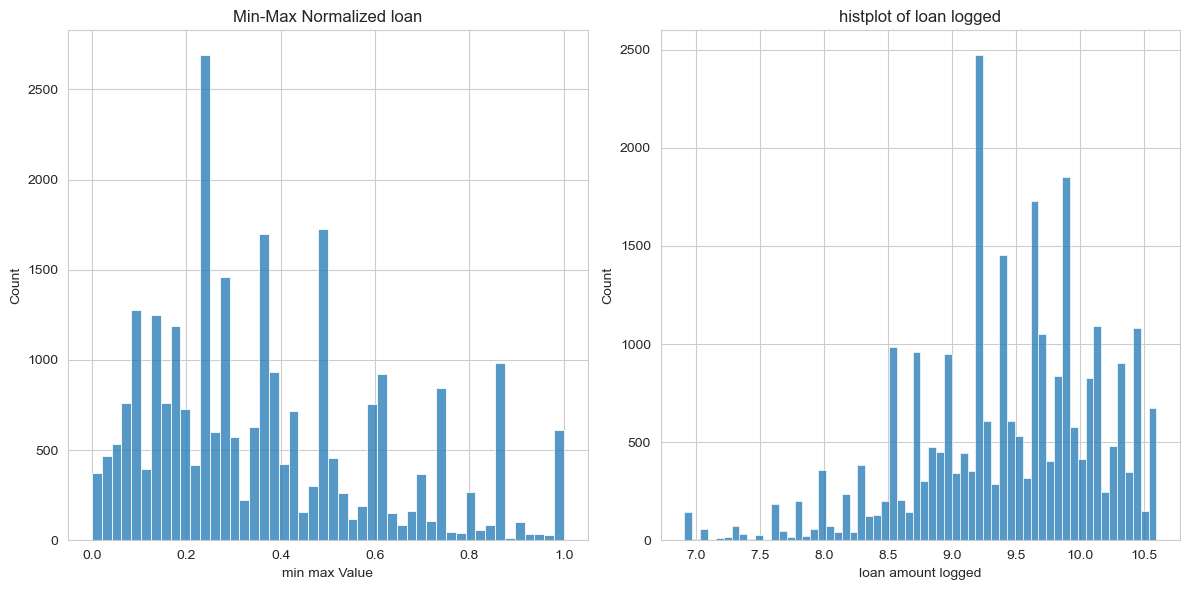

In [3003]:
plt.figure(figsize=(12, 6))

# Min-Max Normalization Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=df_encoded["loan_amount_normalized"])
plt.title('Min-Max Normalized loan')
plt.xlabel('min max Value')


plt.subplot(1, 2, 2)
sns.histplot(x=df_encoded["loan_amount_normalize_log"])
plt.title(f'histplot of loan logged')
plt.xlabel('loan amount logged')

plt.tight_layout()
plt.show()
plt.show()




In [3004]:
scaler = MinMaxScaler() 
df_encoded['funded_amount_normalized'] = scaler.fit_transform(df_encoded[['funded_amount']]) 
df_encoded[['funded_amount', 'funded_amount_normalized']]
df_encoded['funded_amount_logged'] = np.log(df_encoded['funded_amount']+1)

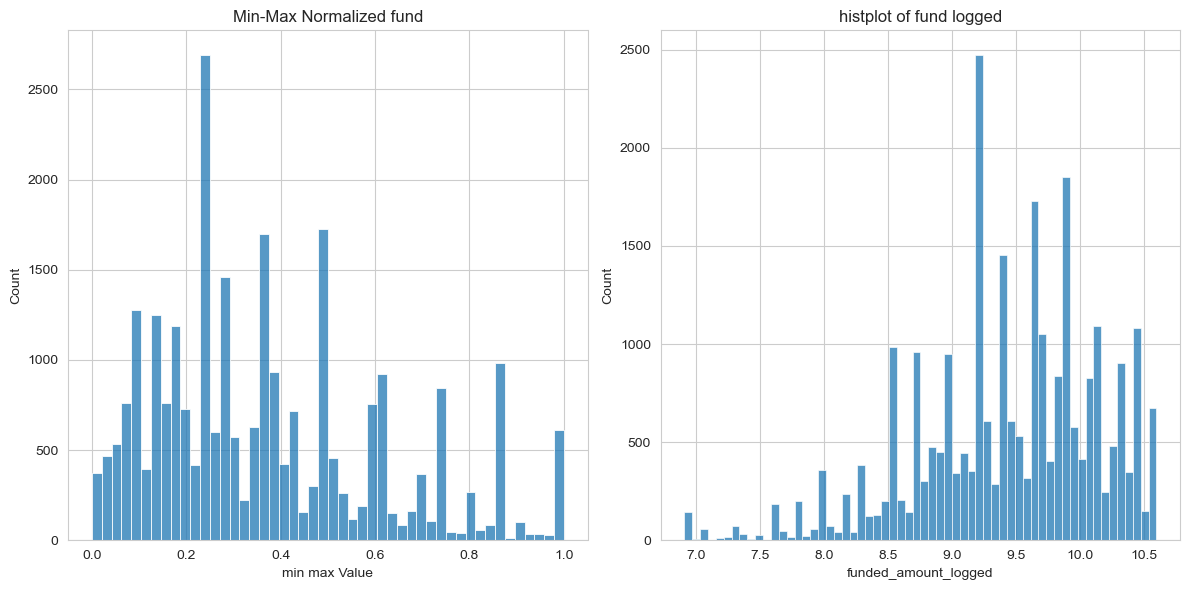

In [3005]:
plt.figure(figsize=(12, 6))

# Min-Max Normalization Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=df_encoded["funded_amount_normalized"])
plt.title('Min-Max Normalized fund')
plt.xlabel('min max Value')


plt.subplot(1, 2, 2)
sns.histplot(x=df_encoded["funded_amount_logged"])
plt.title(f'histplot of fund logged')
plt.xlabel("funded_amount_logged")

plt.tight_layout()
plt.show()
plt.show()


log here is not correct it make it skewed in the opposite direction
eaning that the loan amounts have a longer tail on the right. In practical terms, it suggests that most loan amounts are concentrated at lower values, with a few large loan amounts stretching the distribution to the right. same for fund so will keep only the min max

In [3006]:
scaler = MinMaxScaler() 
df_encoded["monthly_installement_normalized"] = scaler.fit_transform(df_encoded[['monthly_installement']]) 
df_encoded[['monthly_installement', 'monthly_installement_normalized']]
df_encoded['monthly_installement_logged'] = np.log(df_encoded['monthly_installement']+1)

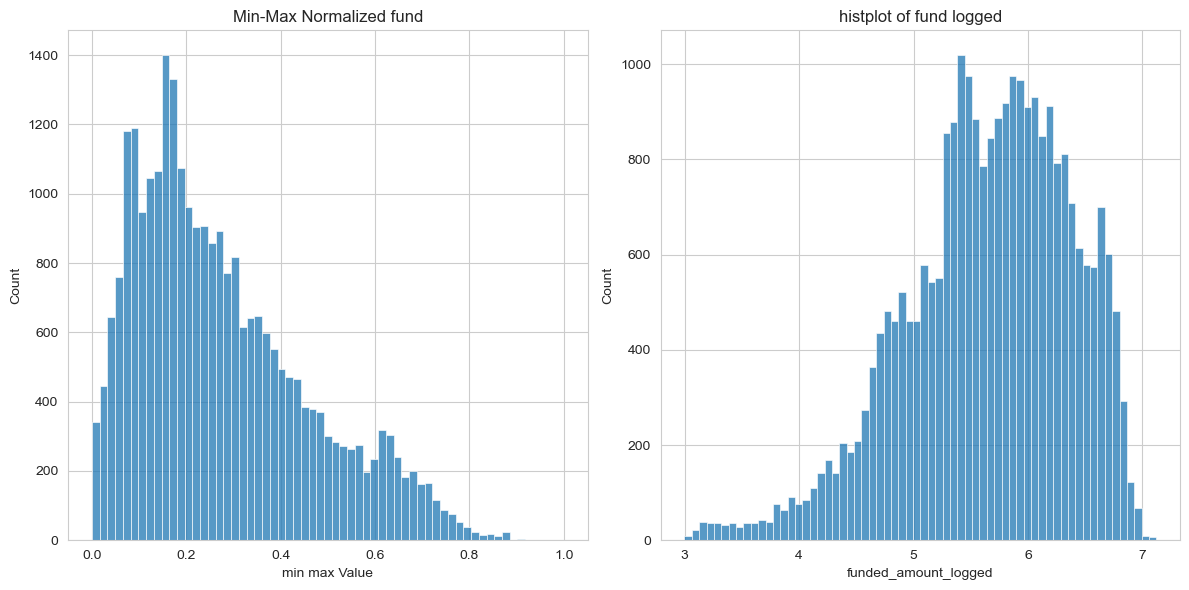

In [3007]:
plt.figure(figsize=(12, 6))

# Min-Max Normalization Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=df_encoded["monthly_installement_normalized"])
plt.title('Min-Max Normalized fund')
plt.xlabel('min max Value')


plt.subplot(1, 2, 2)
sns.histplot(x=df_encoded["monthly_installement_logged"])
plt.title(f'histplot of fund logged')
plt.xlabel("funded_amount_logged")

plt.tight_layout()
plt.show()
plt.show()


also here the more logical to keep it skewed to right better than the left same idea of fund and loan so will keep min max

so min max will save the normal distribution loan and fund only the numerical categories that range very large and installemnts a litle bit

# 5 - Lookup Table(s)

In [3008]:
purpose_lookup = pd.DataFrame({
    'Column': 'purpose',
    'Original': encoderpurpose.classes_,
    'Encoded': range(len(encoderpurpose.classes_))
})
purpose_lookup


Column            Original  Encoded
0   purpose                 car        0
1   purpose         credit_card        1
2   purpose  debt_consolidation        2
3   purpose    home_improvement        3
4   purpose               house        4
5   purpose      major_purchase        5
6   purpose             medical        6
7   purpose              moving        7
8   purpose               other        8
9   purpose    renewable_energy        9
10  purpose      small_business       10
11  purpose            vacation       11
12  purpose             wedding       12

In [3009]:
addr_state_lookup = pd.DataFrame({
    'Column': 'addr_state',
    'Original': encoder_addr_state.classes_,
    'Encoded': range(len(encoder_addr_state.classes_))
})
addr_state_lookup.head()

Column Original  Encoded
0  addr_state       AK        0
1  addr_state       AL        1
2  addr_state       AR        2
3  addr_state       AZ        3
4  addr_state       CA        4

In [3010]:
state_lookup = pd.DataFrame({
    'Column': 'state',
    'Original': encoder_state.classes_,
    'Encoded': range(len(encoder_state.classes_))
})
state_lookup.head()

Column Original  Encoded
0  state       AK        0
1  state       AL        1
2  state       AR        2
3  state       AZ        3
4  state       CA        4

In [3011]:
loan_status_lookup = pd.DataFrame({
    'Column': 'loan_status',
    'Original': encoder_loan_status.categories_[0],
    'Encoded': encoder_loan_status.get_feature_names_out(['loan_status']).tolist()
})
loan_status_lookup


Column            Original                         Encoded
0  loan_status         charged off         loan_status_charged off
1  loan_status             current             loan_status_current
2  loan_status             default             loan_status_default
3  loan_status          fully paid          loan_status_fully paid
4  loan_status     in grace period     loan_status_in grace period
5  loan_status   late (16-30 days)   loan_status_late (16-30 days)
6  loan_status  late (31-120 days)  loan_status_late (31-120 days)

In [3012]:
letter_grade_lookup = pd.DataFrame({
    'Column': 'letter_grade',
    'Original': encoder_letter_grade.classes_,
    'Encoded': range(len(encoder_letter_grade.classes_))
})
letter_grade_lookup

Column Original  Encoded
0  letter_grade        A        0
1  letter_grade        B        1
2  letter_grade        C        2
3  letter_grade        D        3
4  letter_grade        E        4
5  letter_grade        F        5
6  letter_grade        G        6

In [3013]:
home_ownership_lookup = pd.DataFrame({
    'Column': 'home_ownership',
    'Original': encoder_home.categories_[0],
    'Encoded': encoder_home.get_feature_names_out(['home_ownership']).tolist()
})
home_ownership_lookup

Column  Original                  Encoded
0  home_ownership       any       home_ownership_any
1  home_ownership  mortgage  home_ownership_mortgage
2  home_ownership       own       home_ownership_own
3  home_ownership      rent      home_ownership_rent

In [3014]:
verification_status_lookup = pd.DataFrame({
    'Column': "verification_status",
    'Original': encoder_verification_status.categories_[0],
    'Encoded': encoder_verification_status.get_feature_names_out(['verification_status']).tolist()
})
verification_status_lookup

Column         Original                              Encoded
0  verification_status     not verified     verification_status_not verified
1  verification_status  source verified  verification_status_source verified
2  verification_status         verified         verification_status_verified

In [3015]:
type_lookup = pd.DataFrame({
    'Column': "type",
    'Original': encoder_type.categories_[0],
    'Encoded':encoder_type.get_feature_names_out(['type']).tolist()
})
type_lookup

Column    Original          Encoded
0   type  direct_pay  type_direct_pay
1   type  individual  type_individual
2   type       joint       type_joint

adding the employemnt length mapping and term converting from string to int

In [3016]:
emp_length_mapping = {
    '< 1 year': 0,  
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10    
}

# Create a lookup DataFrame for emp_length
emp_length_and_term_lookup = pd.DataFrame({
    'Column': 'emp_length',
    'Original': list(emp_length_mapping.keys()) + ['36 months', '60 months'],
    'Encoded': [emp_length_mapping[key] for key in emp_length_mapping.keys()] + [36, 60]
})

In [3017]:
payment_plan_mapping = {
    True: 1,
    False: 0
}
rows = []
for original, encoded in payment_plan_mapping.items():
    rows.append({
        'Column': 'Pymnt Plan',
        'Original': original,
        'Encoded': encoded
    })

pymnt_plan_lookup = pd.DataFrame(rows)
salary_can_cover_mapping = {
    True: 1,
    False: 0
}
rows = []
for original, encoded in salary_can_cover_mapping.items():
    rows.append({
        'Column': "salary_can_cover",
        'Original': original,
        'Encoded': encoded
    })

salary_can_cover_lookup = pd.DataFrame(rows)

In [3018]:
lookup_df = pd.concat([purpose_lookup, type_lookup,verification_status_lookup,state_lookup,addr_state_lookup,loan_status_lookup,letter_grade_lookup,
                       home_ownership_lookup,emp_length_and_term_lookup,pymnt_plan_lookup,salary_can_cover_lookup], ignore_index=True)


lookup_df.to_csv('C:/Users/hp/Downloads/DE PROJECT1/encoding_lookup_table.csv', index=False)

# 6 - Bonus ( Data Integration )

In [3019]:
import requests
from bs4 import BeautifulSoup

In [3020]:

url = 'https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971'


response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    state_mapping = {}
    rows = soup.find_all('tr')[1:] 
    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 2:
            state_name = cells[0].text.strip()  
            state_code = cells[2].text.strip()  
            state_mapping[state_code] = state_name
        
else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')


In [3021]:
df_bonus=df_encoded.copy()
df_bonus['state_name'] = df_bonus["state"].map(state_mapping)
df_bonus.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
70935                 underwrirer  10+ years       mortgage   11.407576   
63172    regional sales executive    4 years           rent   11.184435   
14799       library specialist ii    2 years           rent   10.596660   
259816                   attorney    3 years       mortgage   11.695255   
191729                      owner    8 years           rent   10.915107   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
70935           11.407576            verified    346xx         FL   
63172           11.184435     source verified    640xx         MO   
14799           10.596660     source verified    201xx         VA   
259816          11.695255            verified    303xx         GA   
191729          10.915107        not verified    333xx         FL   

         avg_cur_bal  tot_cur_bal      loan_status  loan_amount state  \
loan_id                                                                 
70935      10.239210    12.724089          current       8400.0    FL   
63172       7.649216    10.421120       fully paid       8000.0    MO   
14799       9.772524    11.851895  in grace period       3500.0    VA   
259816      9.212538    12.256980       fully paid      35000.0    GA   
191729      8.343078     9.729194          current      20000.0    FL   

         funded_amount        term  int_rate  grade issue_date  pymnt_plan  \
loan_id                                                                      
70935           8400.0   36 months    0.0881      4 2019-01-19       False   
63172           8000.0   36 months    0.0789      1 2015-07-15       False   
14799           3500.0   36 months    0.1806     18 2017-07-17       False   
259816         35000.0   60 months    0.1531     11 2016-02-16       False   
191729         20000.0   36 months    0.1049      7 2016-07-16       False   

               type             purpose         description  term_no  \
loan_id                                                                
70935    individual  debt_consolidation  debt consolidation       36   
63172    individual    home_improvement    home improvement       36   
14799    individual               other               other       36   
259816   individual  debt_consolidation  debt consolidation       60   
191729   individual  debt_consolidation  debt consolidation       36   

         emp_length_no  month_no  salary_can_cover letter_grade  \
loan_id                                                           
70935               10         1              True            A   
63172                4         7              True            A   
14799                2         7              True            D   
259816               3         2              True            C   
191729               8         7              True            B   

         monthly_installement  home_ownership_any  home_ownership_mortgage  \
loan_id                                                                      
70935              173.596615                 0.0                      1.0   
63172              161.790328                 0.0                      0.0   
14799               88.991275                 0.0                      0.0   
259816             838.353686                 0.0                      1.0   
191729             429.778938                 0.0                      0.0   

         home_ownersh

## 5- Exporting the dataframe to a csv file or parquet

drop all not needed coloumns

i can drop state name beacuse if encoded will be same as state but how ever i will leave it as it :))

In [3022]:
df_bonus = df_bonus.drop(columns=["emp_length",	"home_ownership",	"verification_status","addr_state",	"loan_status",	"loan_amount",	"state"	,"funded_amount",
                                  	"term",	"grade"		,"pymnt_plan",	"type","purpose","monthly_installement_logged","funded_amount_logged",	"loan_amount_normalize_log","salary_can_cover"])
df_bonus.head()

customer_id  \
loan_id                                                      
70935    YichUndceGIwVUxceGVjVmoiT1x4ZTdeXHhmNlx4MWZceD...   
63172    YidceDk4O1x4ZWZceGM4XHgxNGpdXHgwZlx4ODVceDg0XV...   
14799    YiciXHhmZEU5XHgxZlx4YjlceGRiXHgwNHBceDE1WVNnXH...   
259816   Yic9XHhjYX5ceGQ0XHhjYVx4OGFceGI1XHhlNFx4YmZsXH...   
191729   YidceDk4aVx4YzJceGZmXVx4ZTVceGY3XHg4OVxuXHg5Ml...   

                        emp_title  annual_inc  annual_inc_joint zip_code  \
loan_id                                                                    
70935                 underwrirer   11.407576         11.407576    346xx   
63172    regional sales executive   11.184435         11.184435    640xx   
14799       library specialist ii   10.596660         10.596660    201xx   
259816                   attorney   11.695255         11.695255    303xx   
191729                      owner   10.915107         10.915107    333xx   

         avg_cur_bal  tot_cur_bal  int_rate issue_date         description  \
loan_id                                                                      
70935      10.239210    12.724089    0.0881 2019-01-19  debt consolidation   
63172       7.649216    10.421120    0.0789 2015-07-15    home improvement   
14799       9.772524    11.851895    0.1806 2017-07-17               other   
259816      9.212538    12.256980    0.1531 2016-02-16  debt consolidation   
191729      8.343078     9.729194    0.1049 2016-07-16  debt consolidation   

         term_no  emp_length_no  month_no letter_grade  monthly_installement  \
loan_id                                                                        
70935         36             10         1            A            173.596615   
63172         36              4         7            A            161.790328   
14799         36              2         7            D             88.991275   
259816        60              3         2            C            838.353686   
191729        36              8         7            B            429.778938   

         home_ownership_any  home_ownership_mortgage  home_ownership_own  \
loan_id                                                                    
70935                   0.0                      1.0                 0.0   
63172                   0.0                      0.0                 0.0   
14799                   0.0                      0.0                 0.0   
259816                  0.0                      1.0                 0.0   
191729                  0.0                      0.0                 0.0   

         home_ownership_rent  verification_status_not verified  \
loan_id                                                          
70935                    0.0                               0.0   
63172                    1.0                               0.0   
14799                    1.0                               0.0   
259816                   0.0                               0.0   
191729                   1.0                               1.0   

         verification_status_source verified  verification_status_verified  \
loan_id                                                                      
70935                                    0.0                           1.0   
63172                                    1.0                           0.0   
14799                                    1.0                           0.0   
259816                                   0.0                           1.0   
191729                                   0.0                           0.0   

         addr_state_encoded  state_encoded  loan_status_charged off  \
loan_id                                                               
70935                     9              9                      0.0   
63172                    23             23                      0.0   
14799                    44             44                      0.0   
259816                   10             10                      0.0   
19

In [3023]:
df_bonus.to_csv('C:/Users/hp/Downloads/DE PROJECT1/fintech_data_MET_P2_52_21362_clean.csv', index=False)